In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyArrowPatch
from highlight_text import fig_text, ax_text

url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/world.geojson"
world = gpd.read_file(url)

url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/co2PerCapita.csv"
df = pd.read_csv(url)

# merge data
data = world.merge(df, how='left', left_on='name', right_on='Country')
data = data[data['continent'] == 'Europe']
data = data[~data['name'].isin(['Russia', 'Iceland'])]
data = data[data['Year'] == 2021]
data = data[['name', 'Total', 'geometry']]
data = data.dropna()
data.head()

name     Total                                           geometry
543    Norway  7.573273  MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...
815    France  4.741312  MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...
1087   Sweden  3.424918  POLYGON ((11.02737 58.85615, 11.46827 59.43239...
1359  Belarus  6.222741  POLYGON ((28.17671 56.16913, 29.22951 55.91834...
1631  Ukraine  4.637058  POLYGON ((32.15944 52.06125, 32.41206 52.28869...

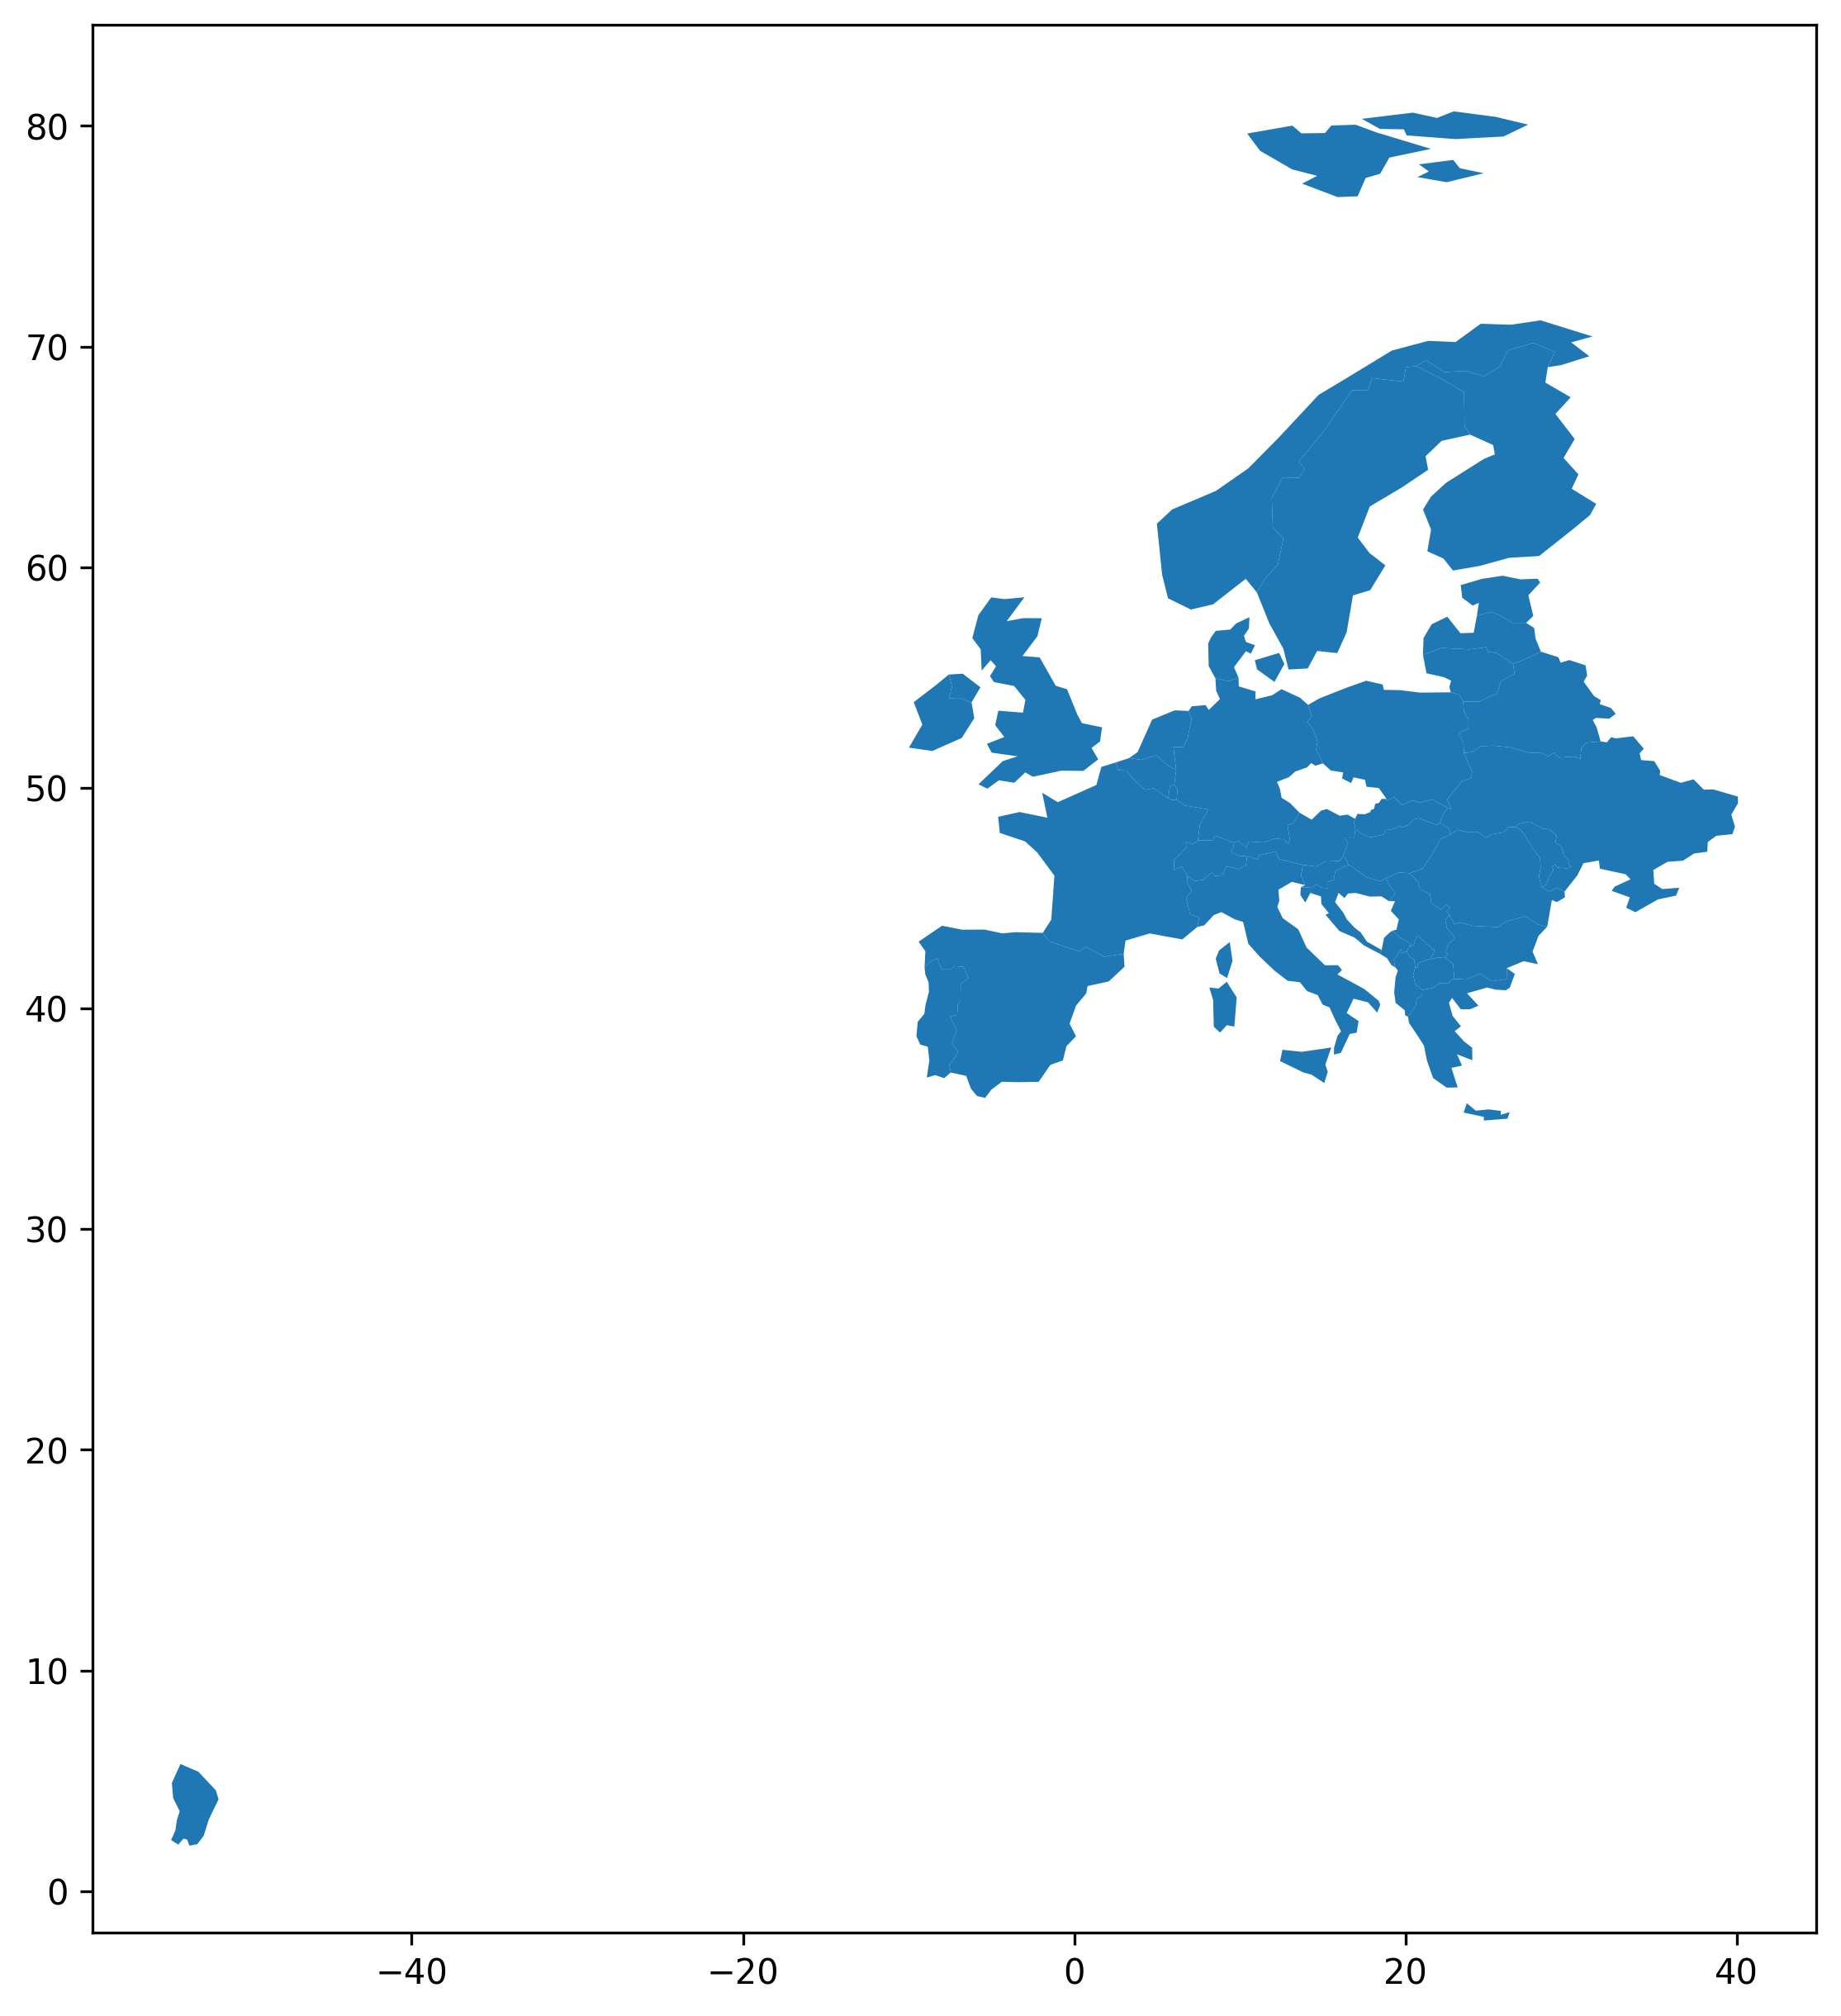

In [2]:
# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax)
plt.savefig("europe_map_1.png", dpi=300)
plt.show()

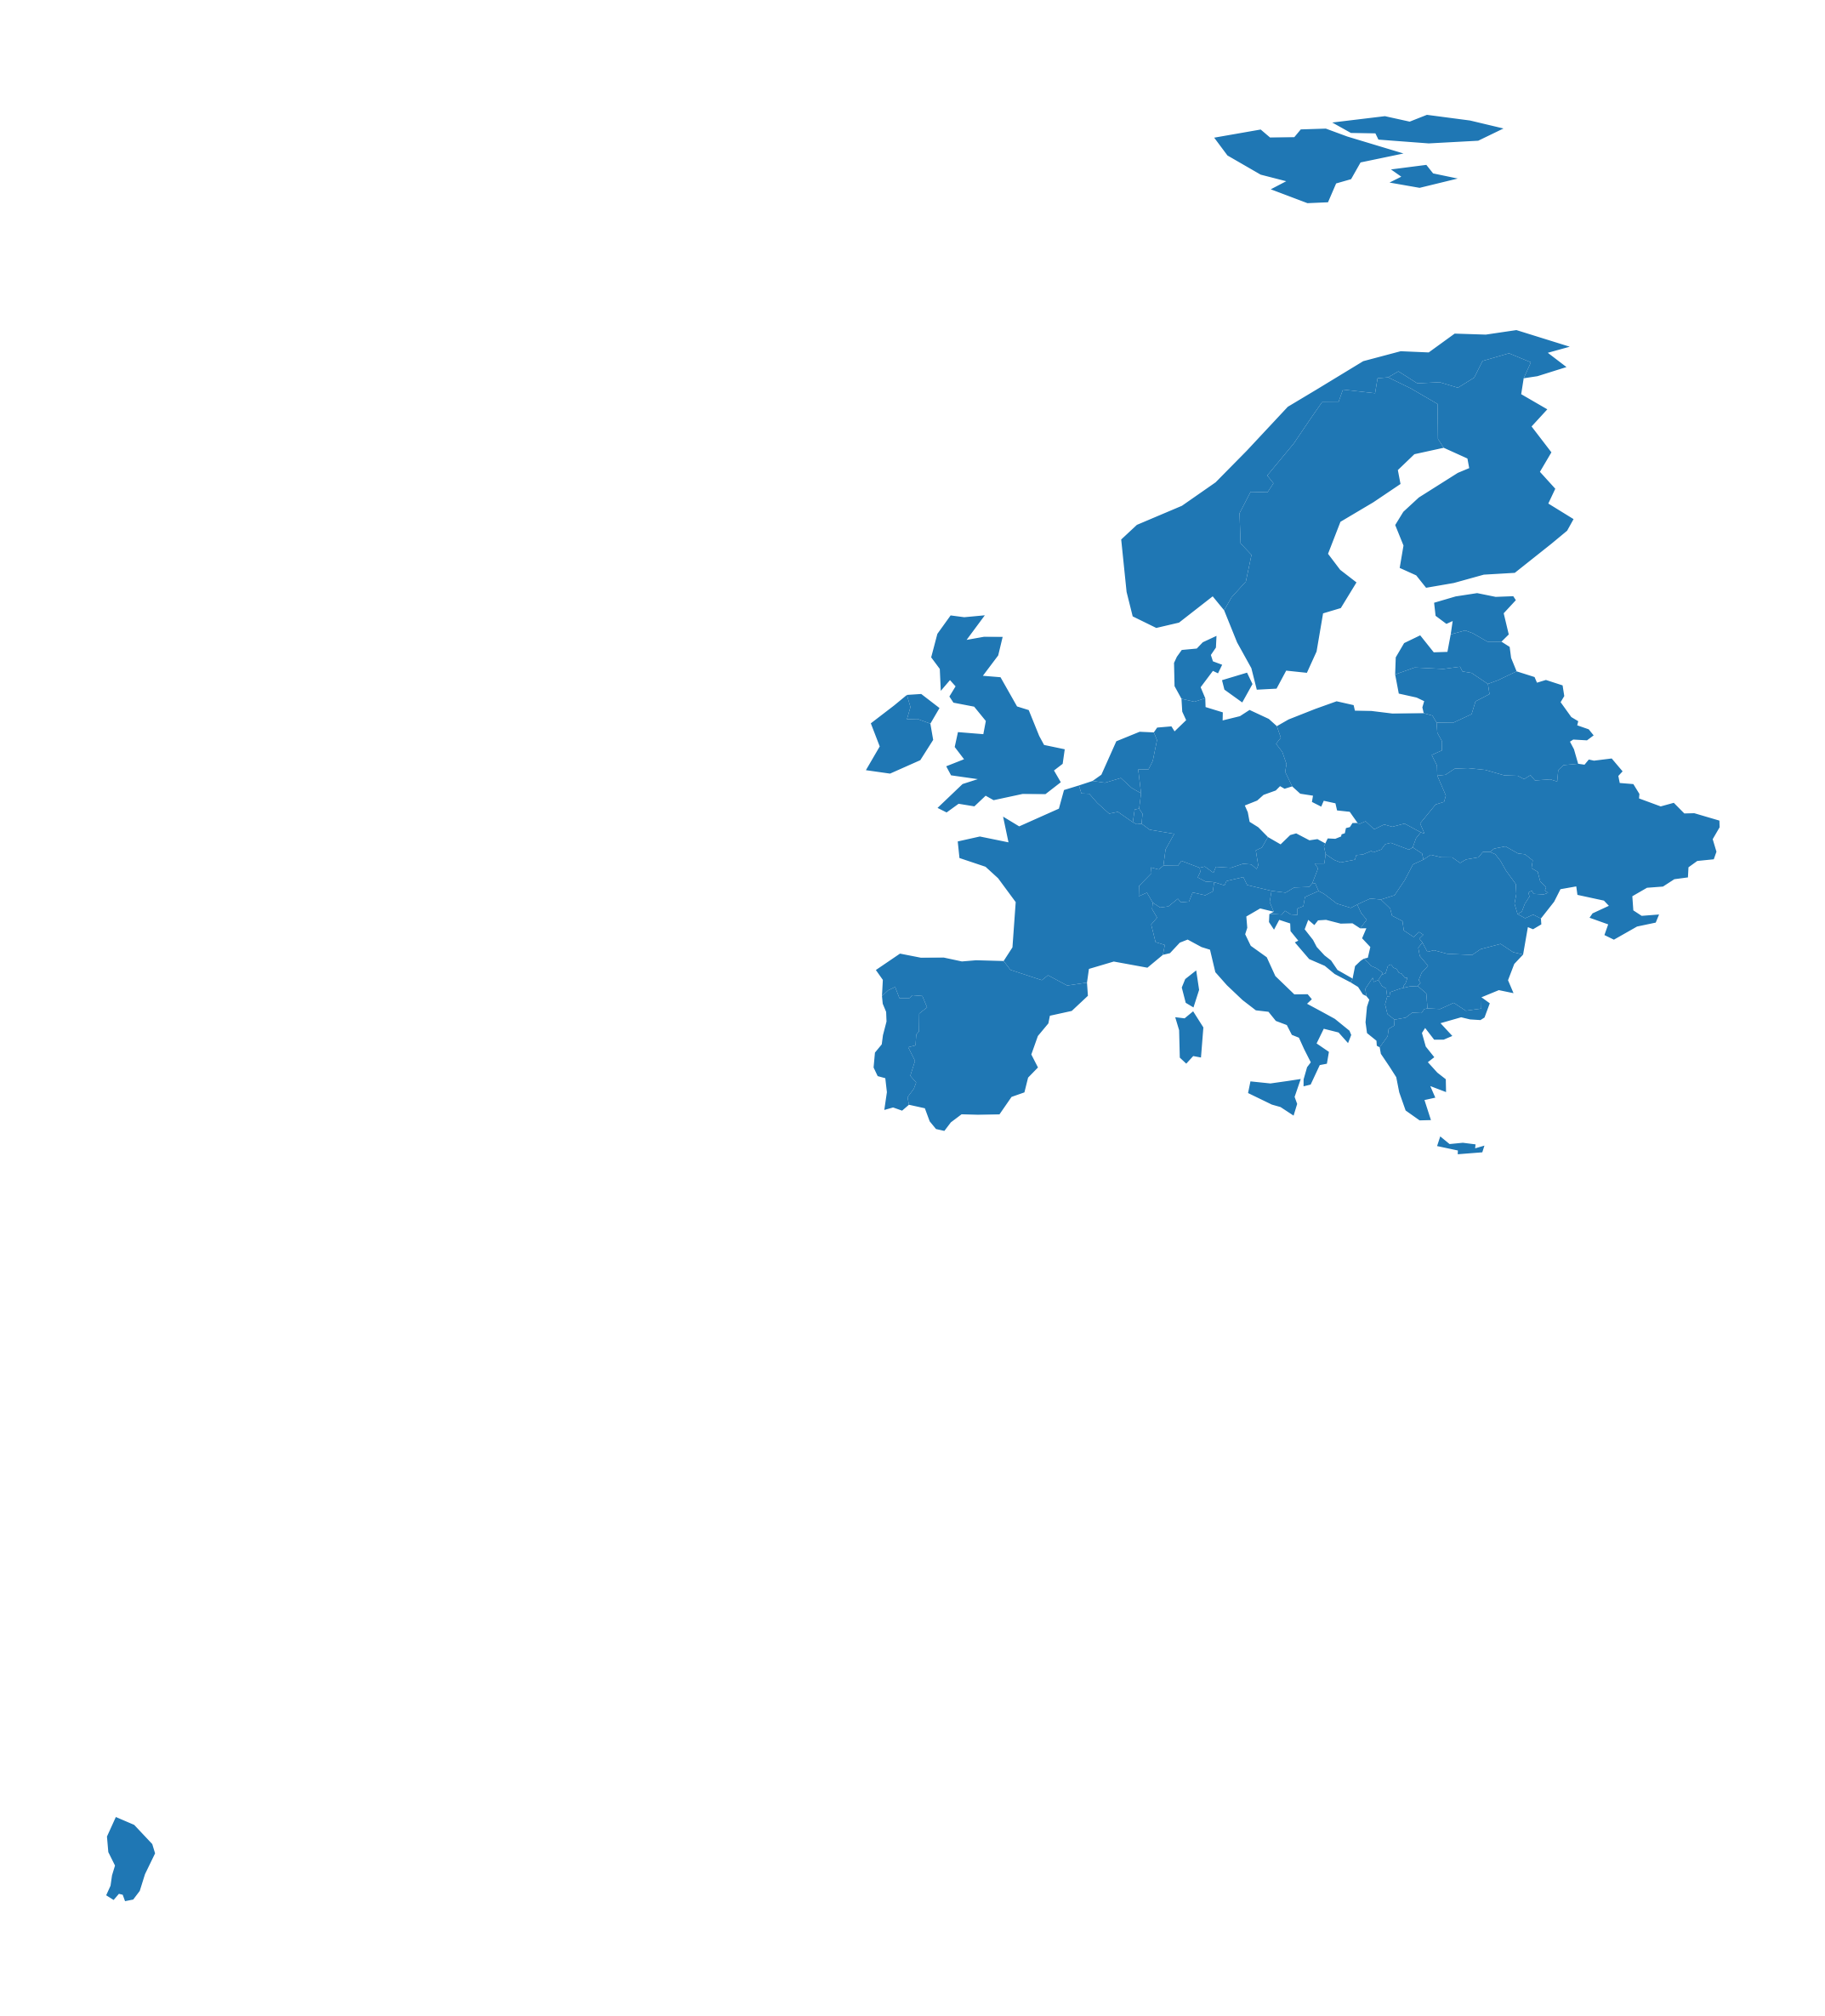

In [3]:
# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax)
ax.set_axis_off()
plt.savefig("europe_map_2.png", dpi=300)
plt.show()

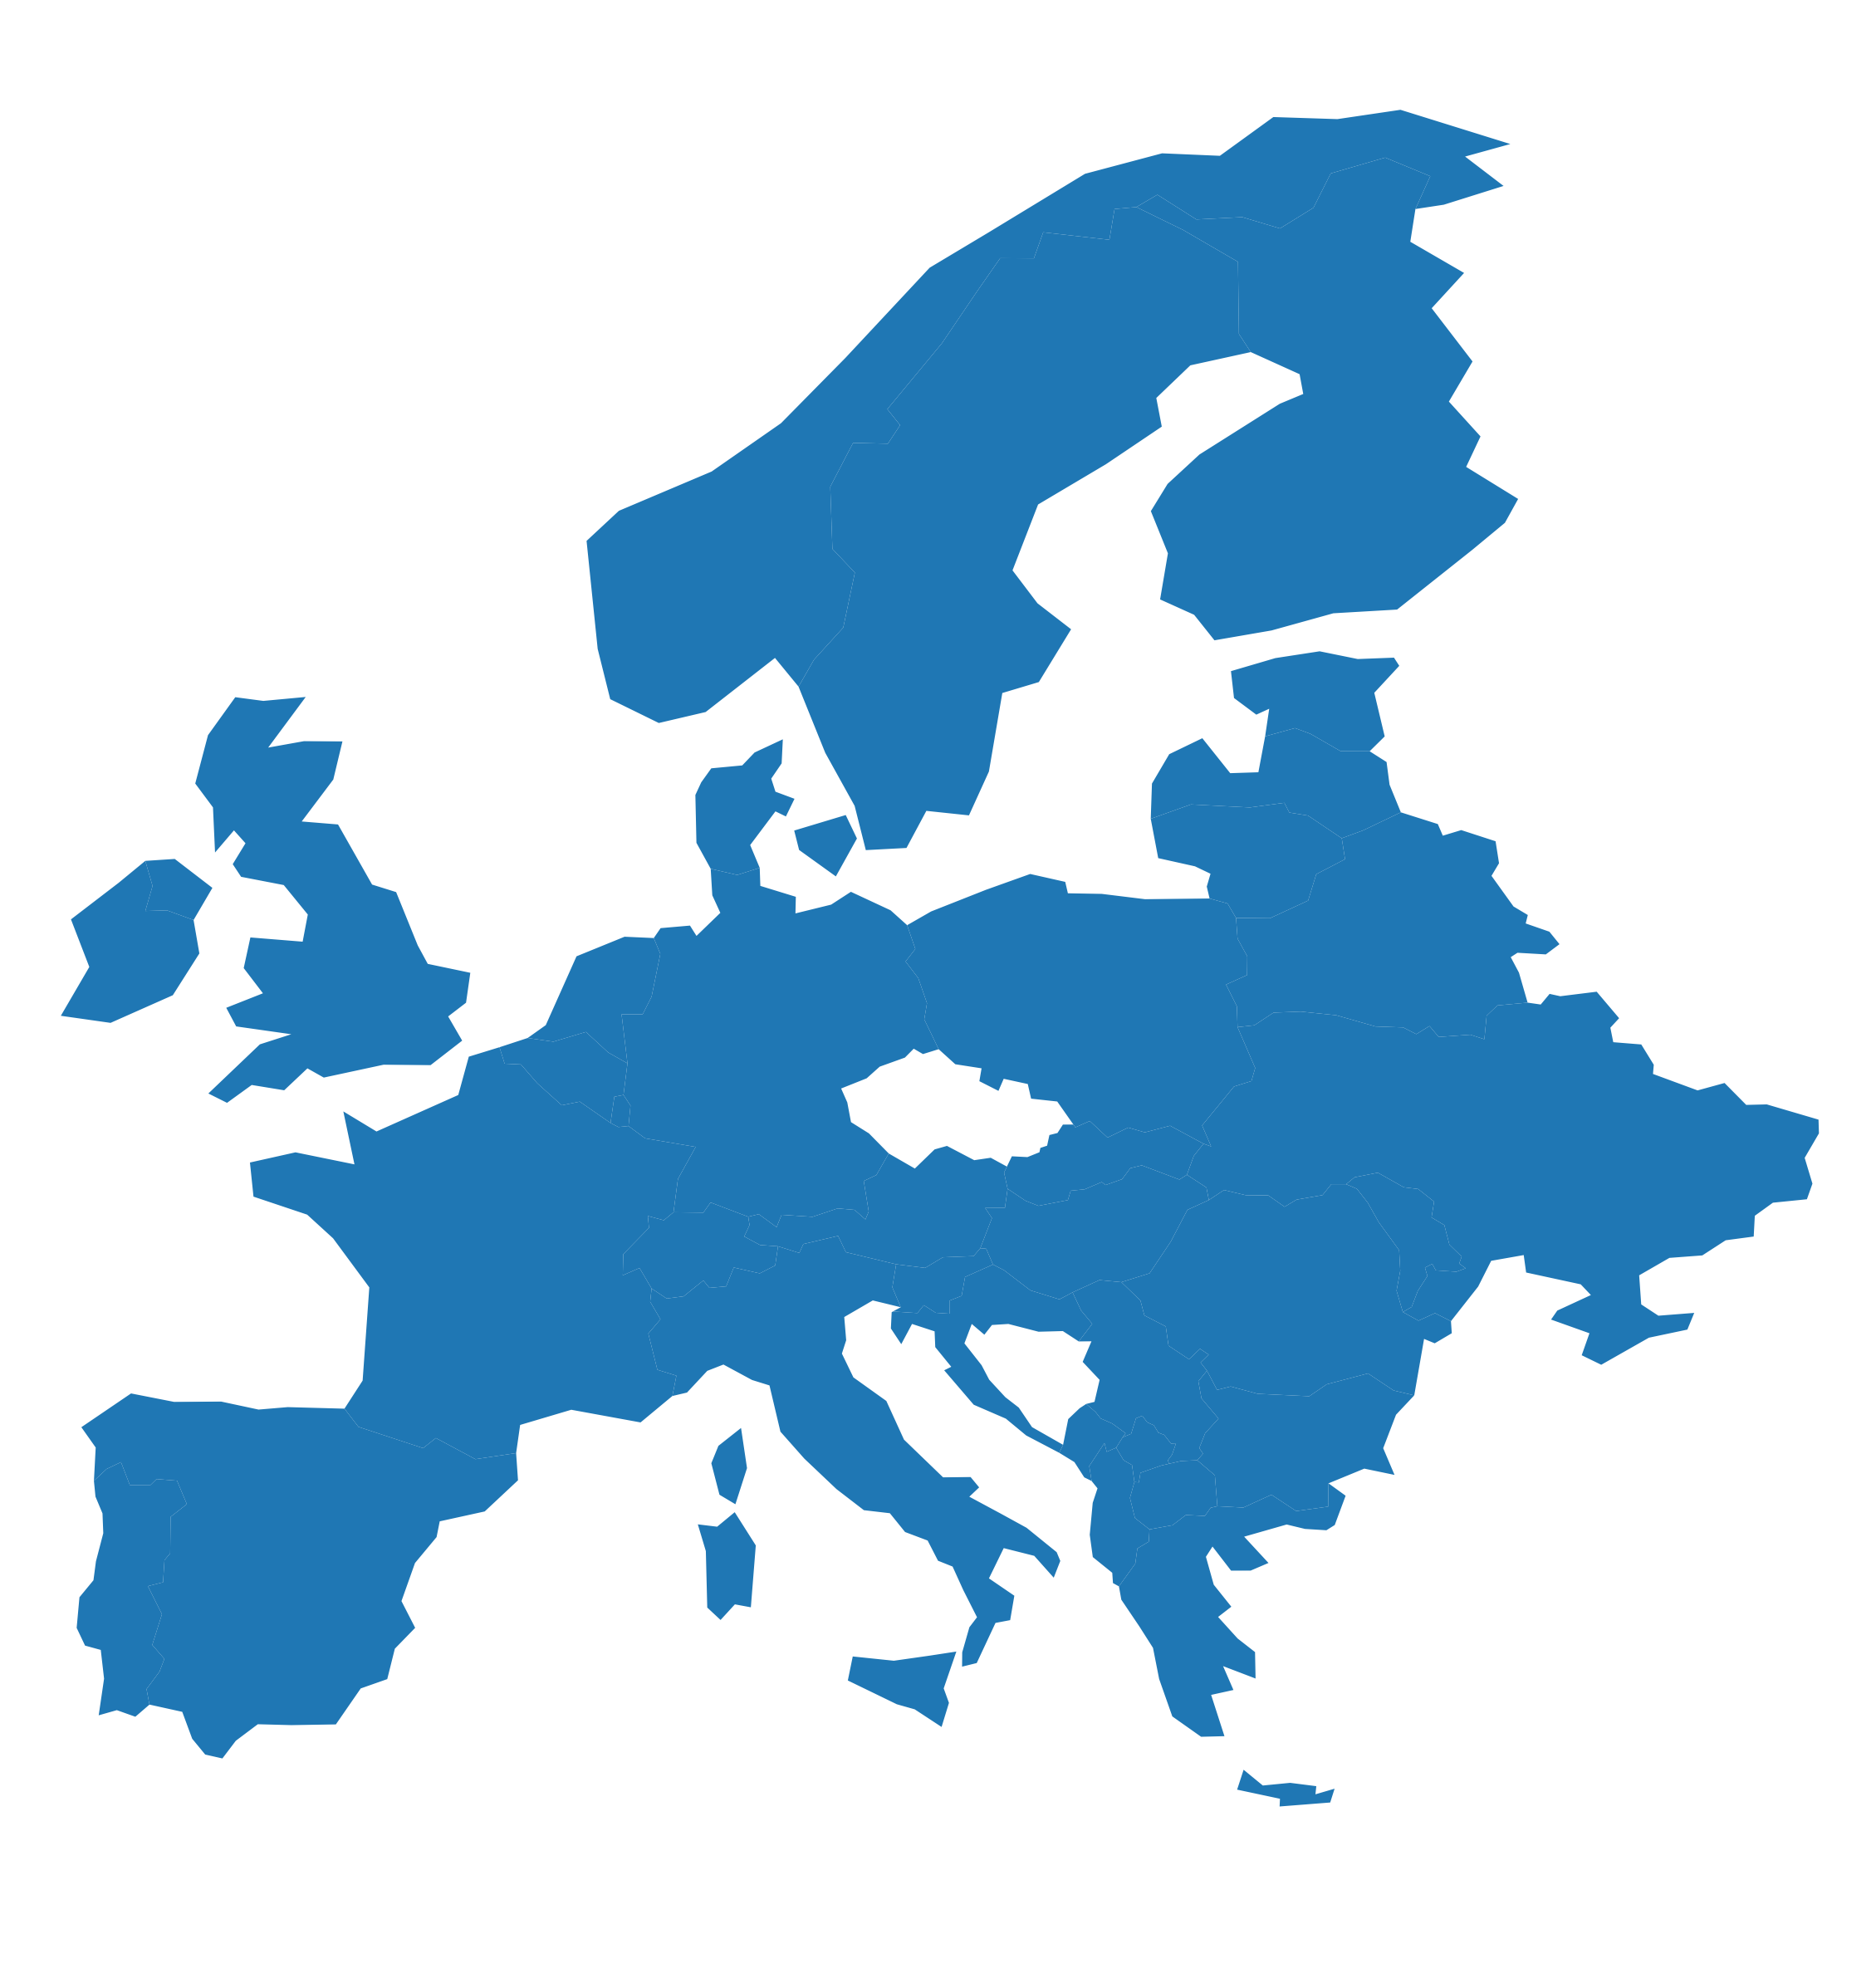

In [4]:
# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

plt.savefig("europe_map_3.png", dpi=300)
plt.show()

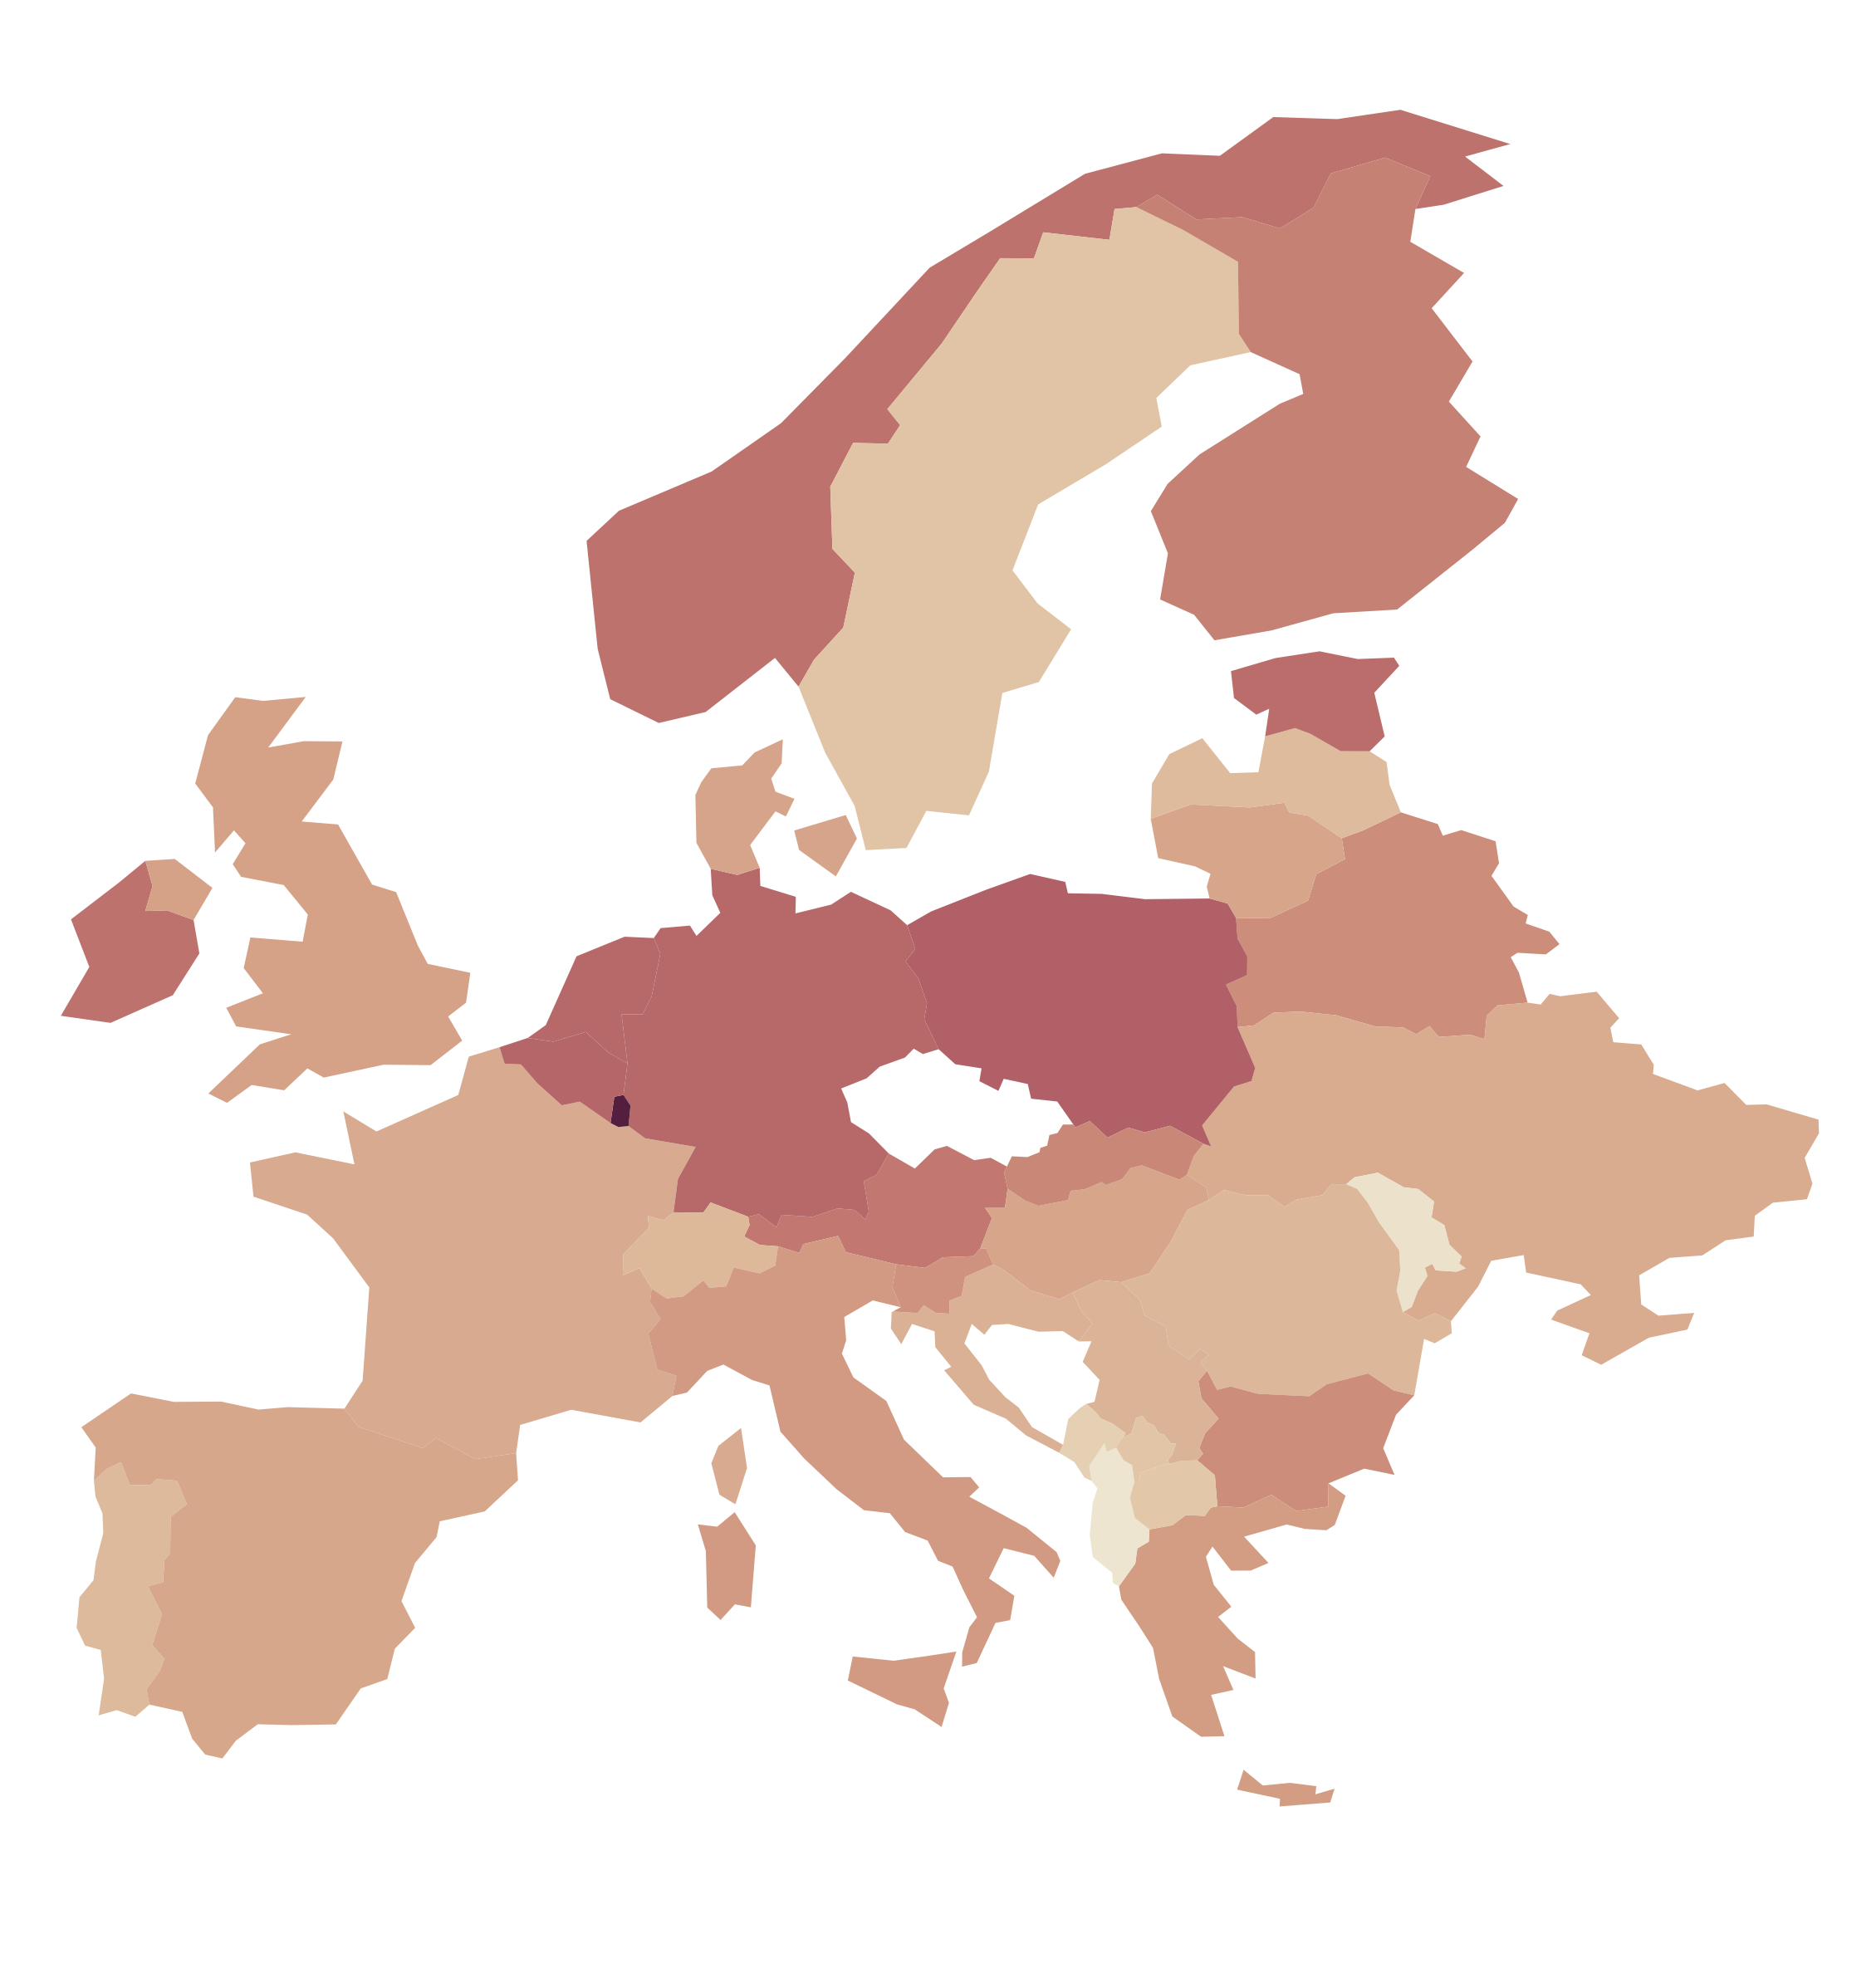

In [5]:
# load colormap
cmap = load_cmap('BrwnYl', type='continuous')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

plt.savefig("europe_map_4.png", dpi=300)
plt.show()

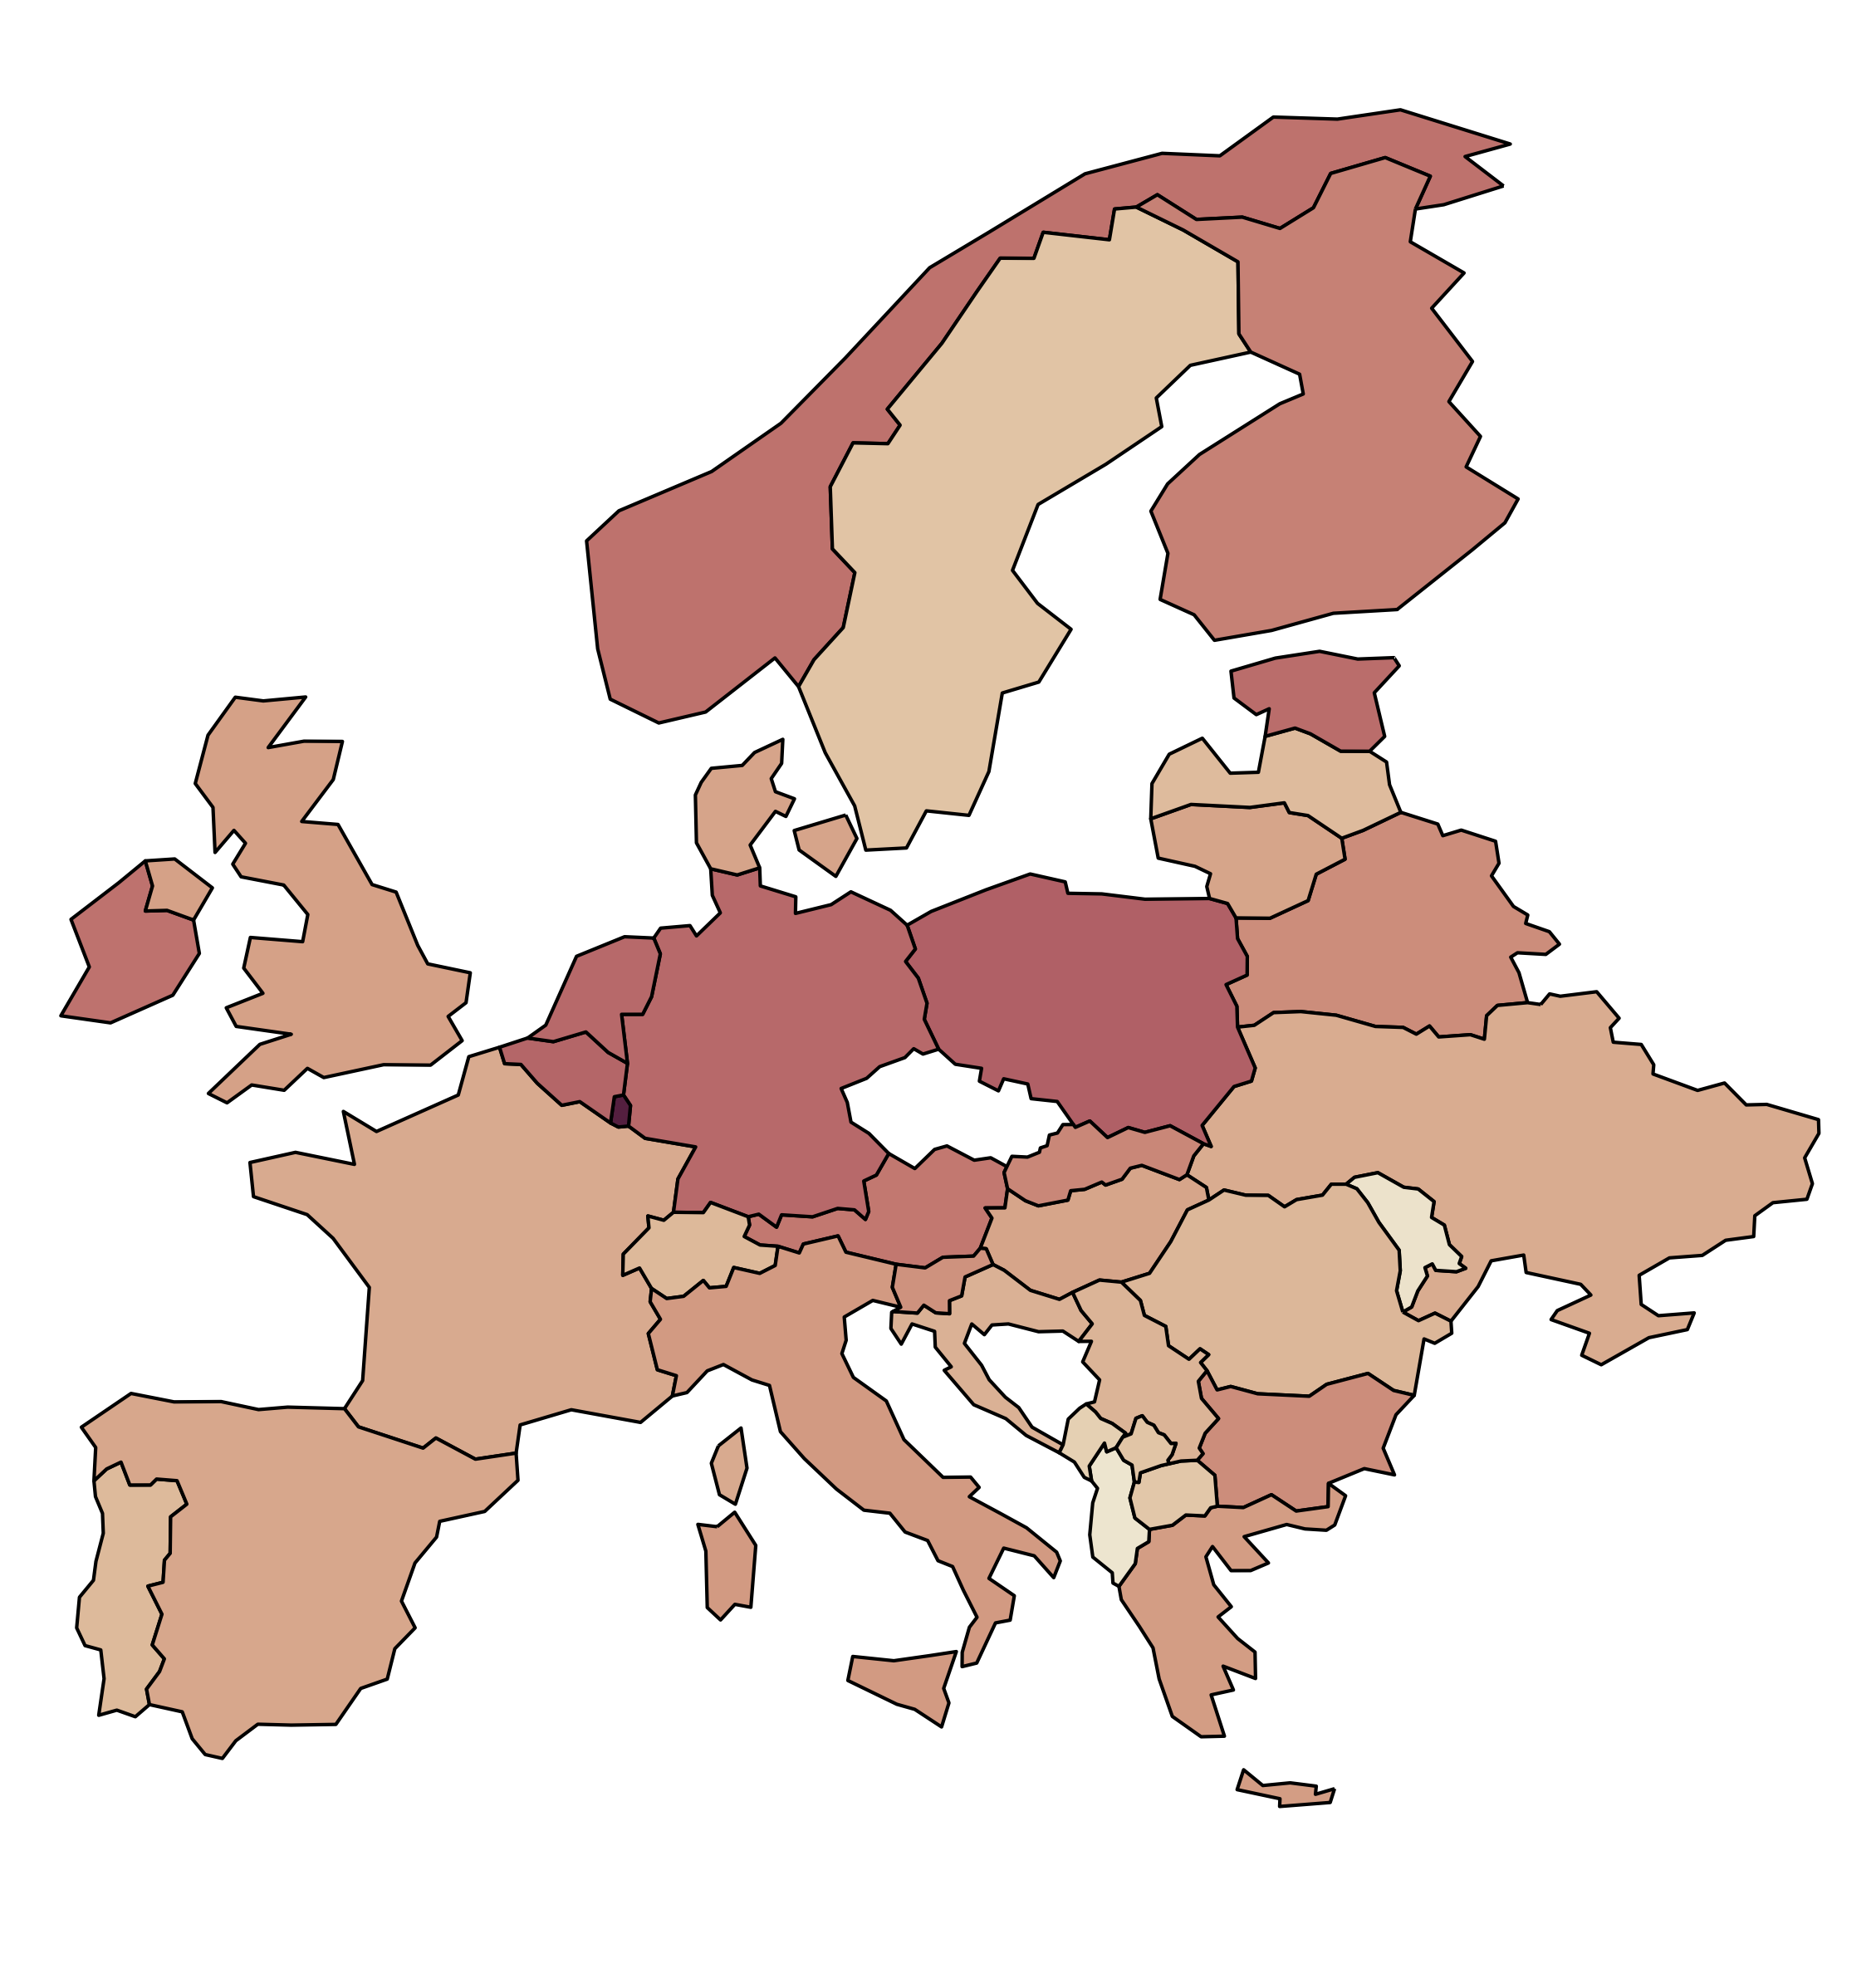

In [6]:
# load colormap
cmap = load_cmap('BrwnYl', type='continuous')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black')

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

plt.savefig("europe_map_5.png", dpi=300)
plt.show()

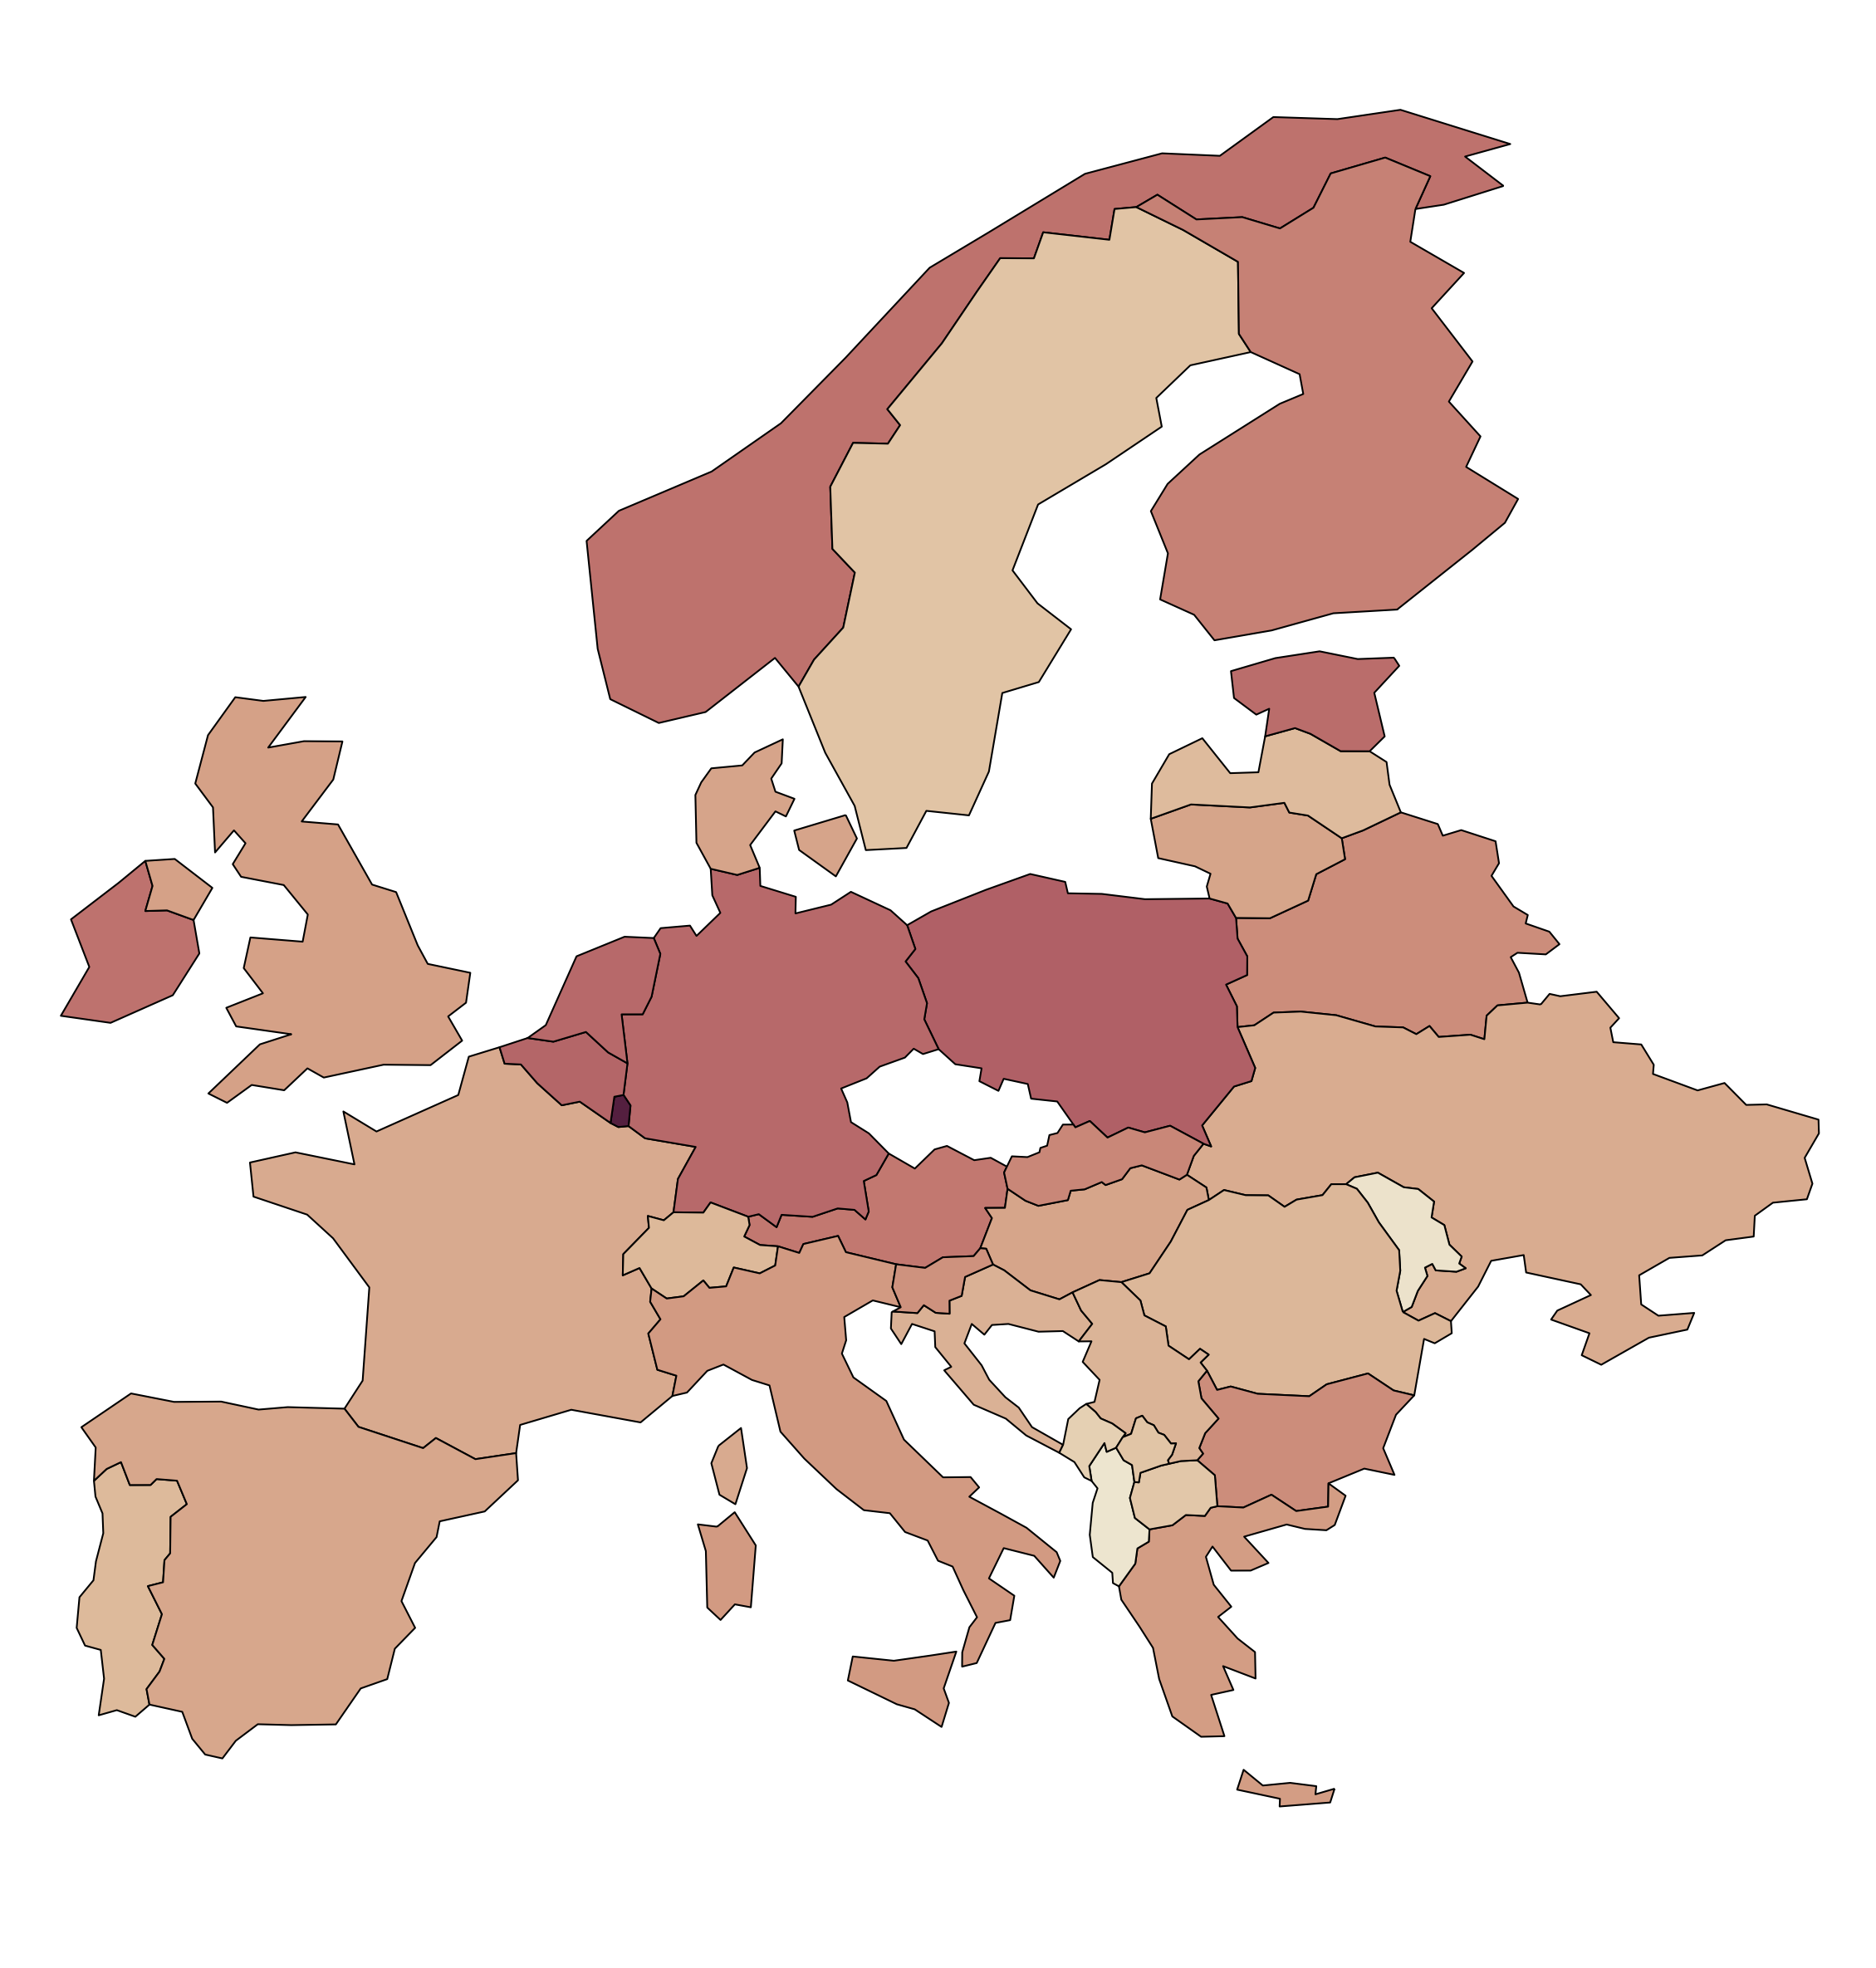

In [7]:
# load colormap
cmap = load_cmap('BrwnYl', type='continuous')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

plt.savefig("europe_map_6.png", dpi=300)
plt.show()

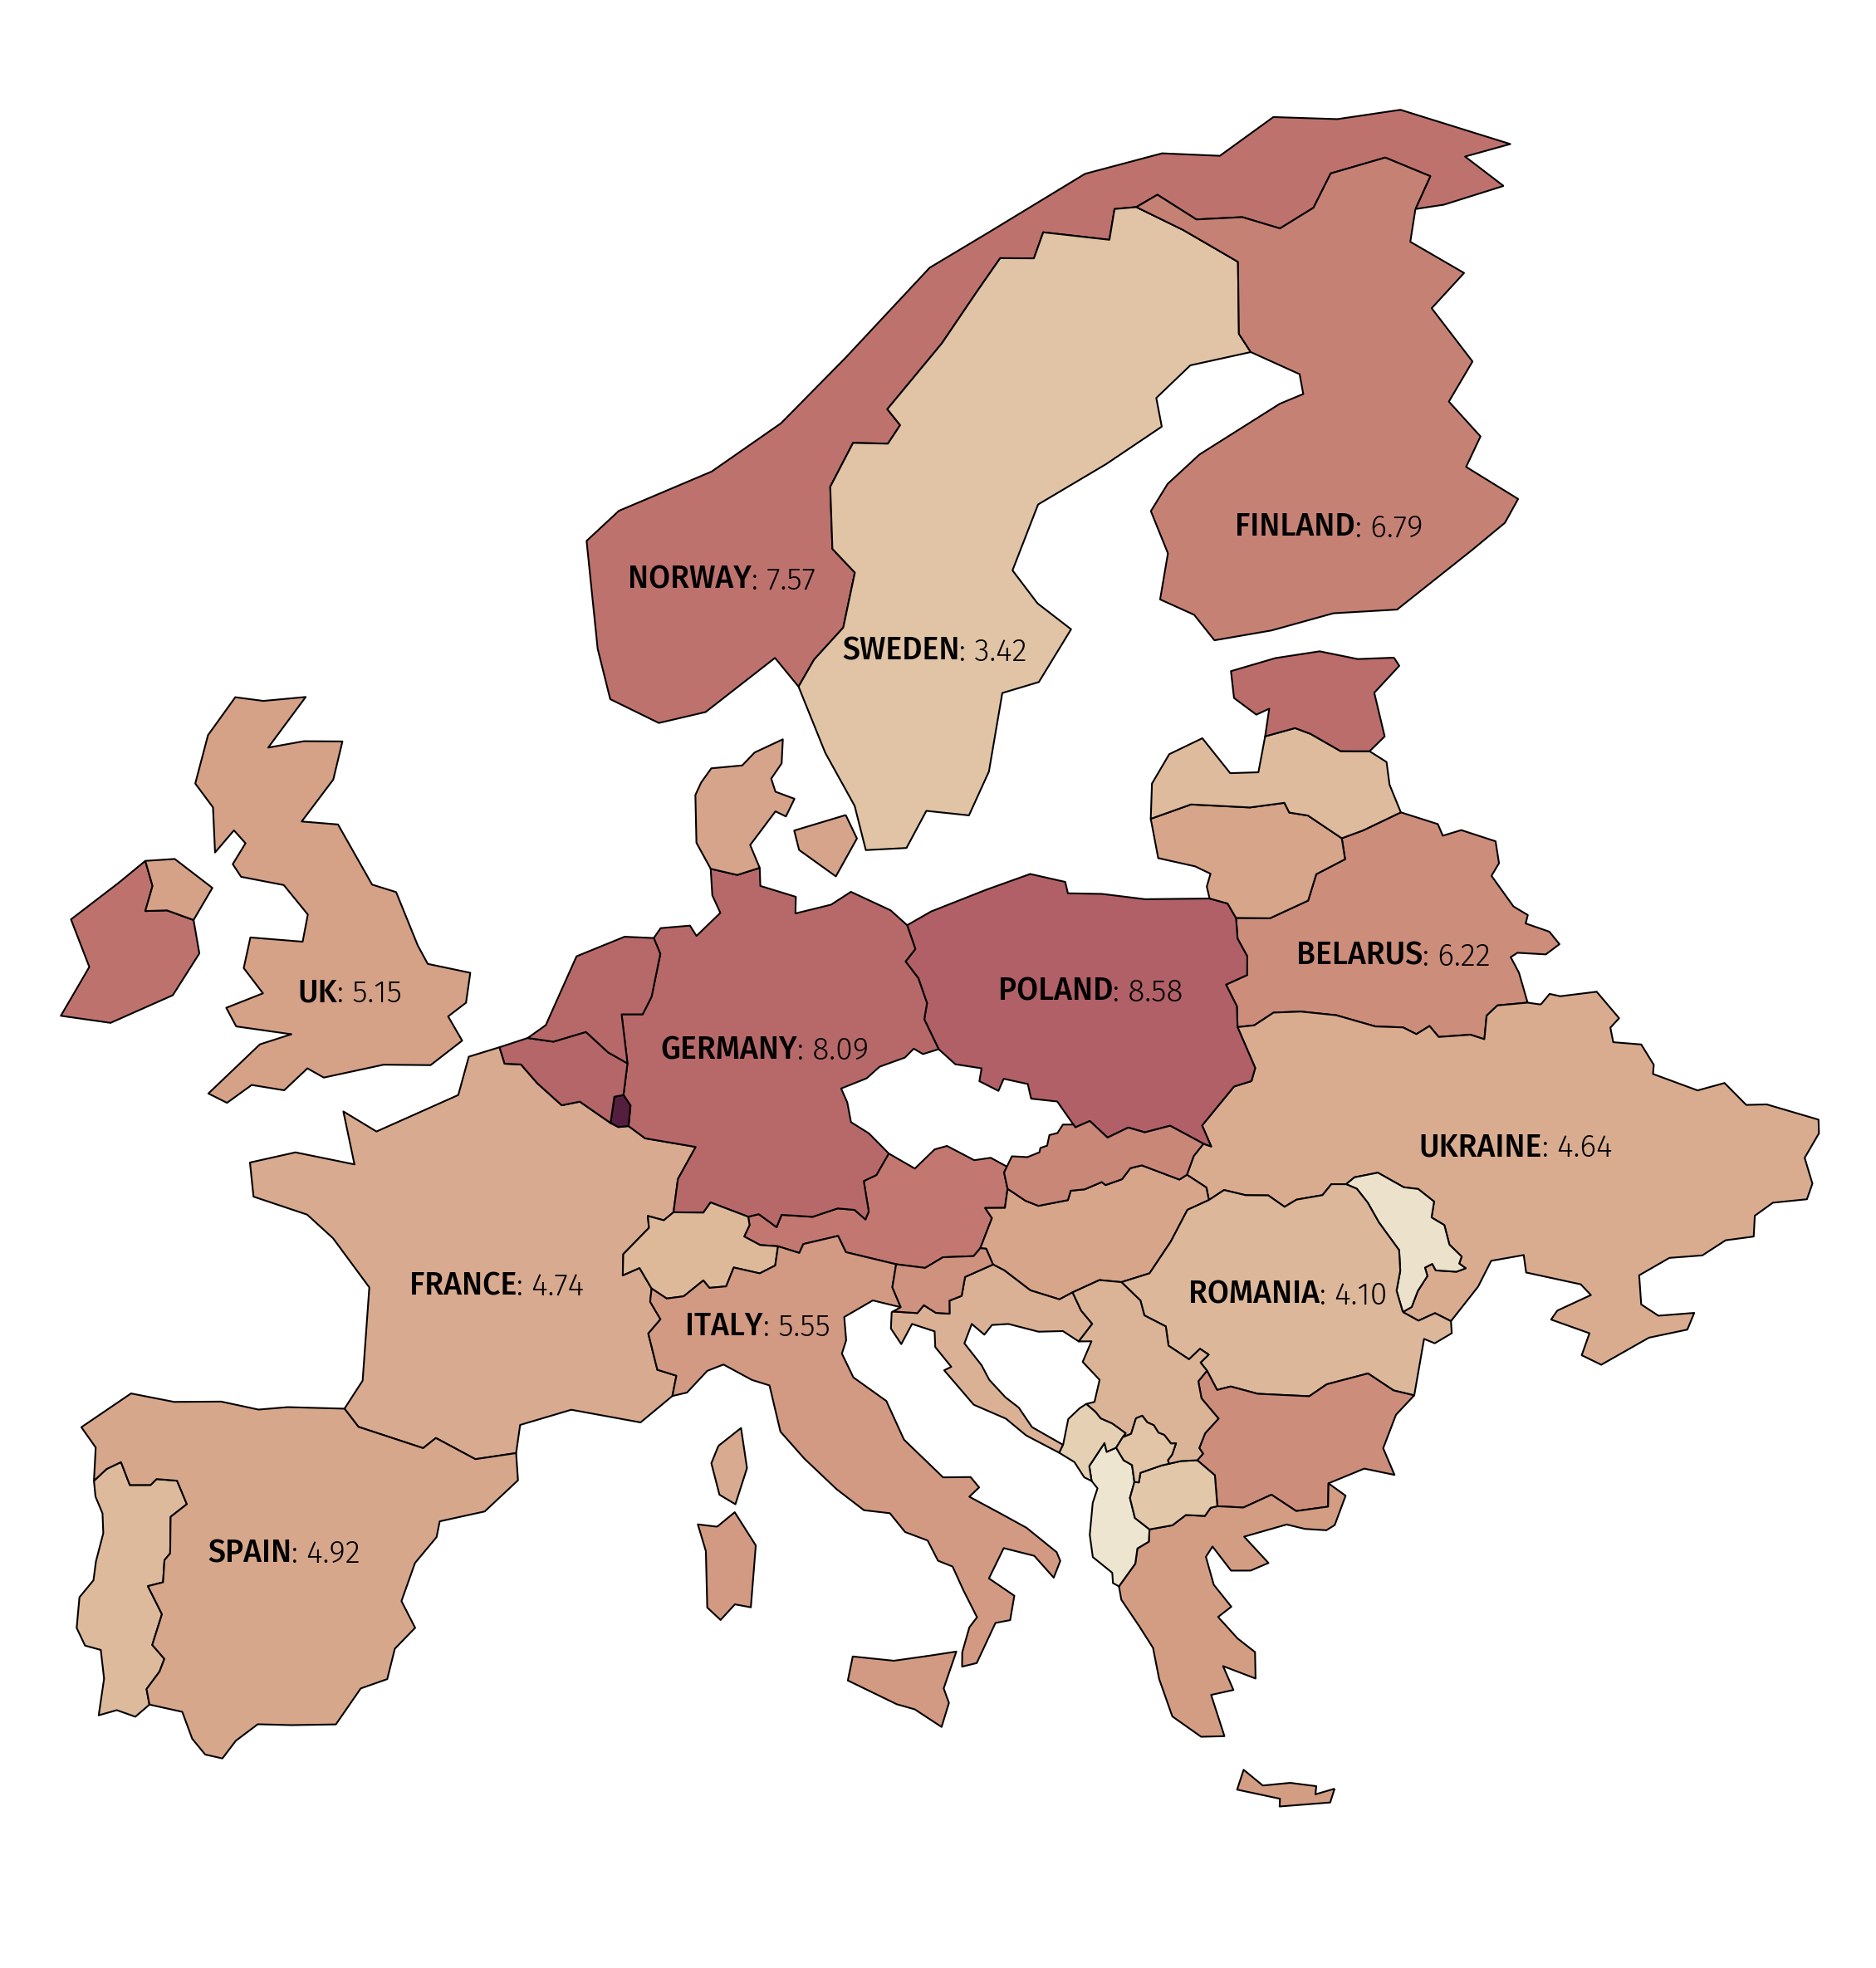

In [8]:
adjustments = {
    'France': (10, 3),
    'Italy': (-2.4, 2.5),
    'Finland': (0, -2),
    'Belarus': (0, -0.4),
    'Ireland': (0, -1),
    'Germany': (-0.2, 0),
    'Poland': (0, 0.2),
    'Sweden': (-1.2, -2.8),
    'United Kingdom': (1, -1.5),
    'Norway': (-4, -5.5),
}

# load colormap and other colors
cmap = load_cmap('BrwnYl', type='continuous')
background_color = 'white'
text_color = 'black'

# load the fonts
personal_path = '/Users/josephbarbier/Library/Fonts/' # change this to your own path
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# compute the centroid of each country
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)

# define which countries to annotate
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine', 'Spain', 'Germany', 
   'Sweden', 'United Kingdom', 'Belarus', 'Norway'
]

# annotate each country
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   color_text = text_color # 'black'
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

plt.savefig("europe_map_7.png", dpi=300)
plt.show()

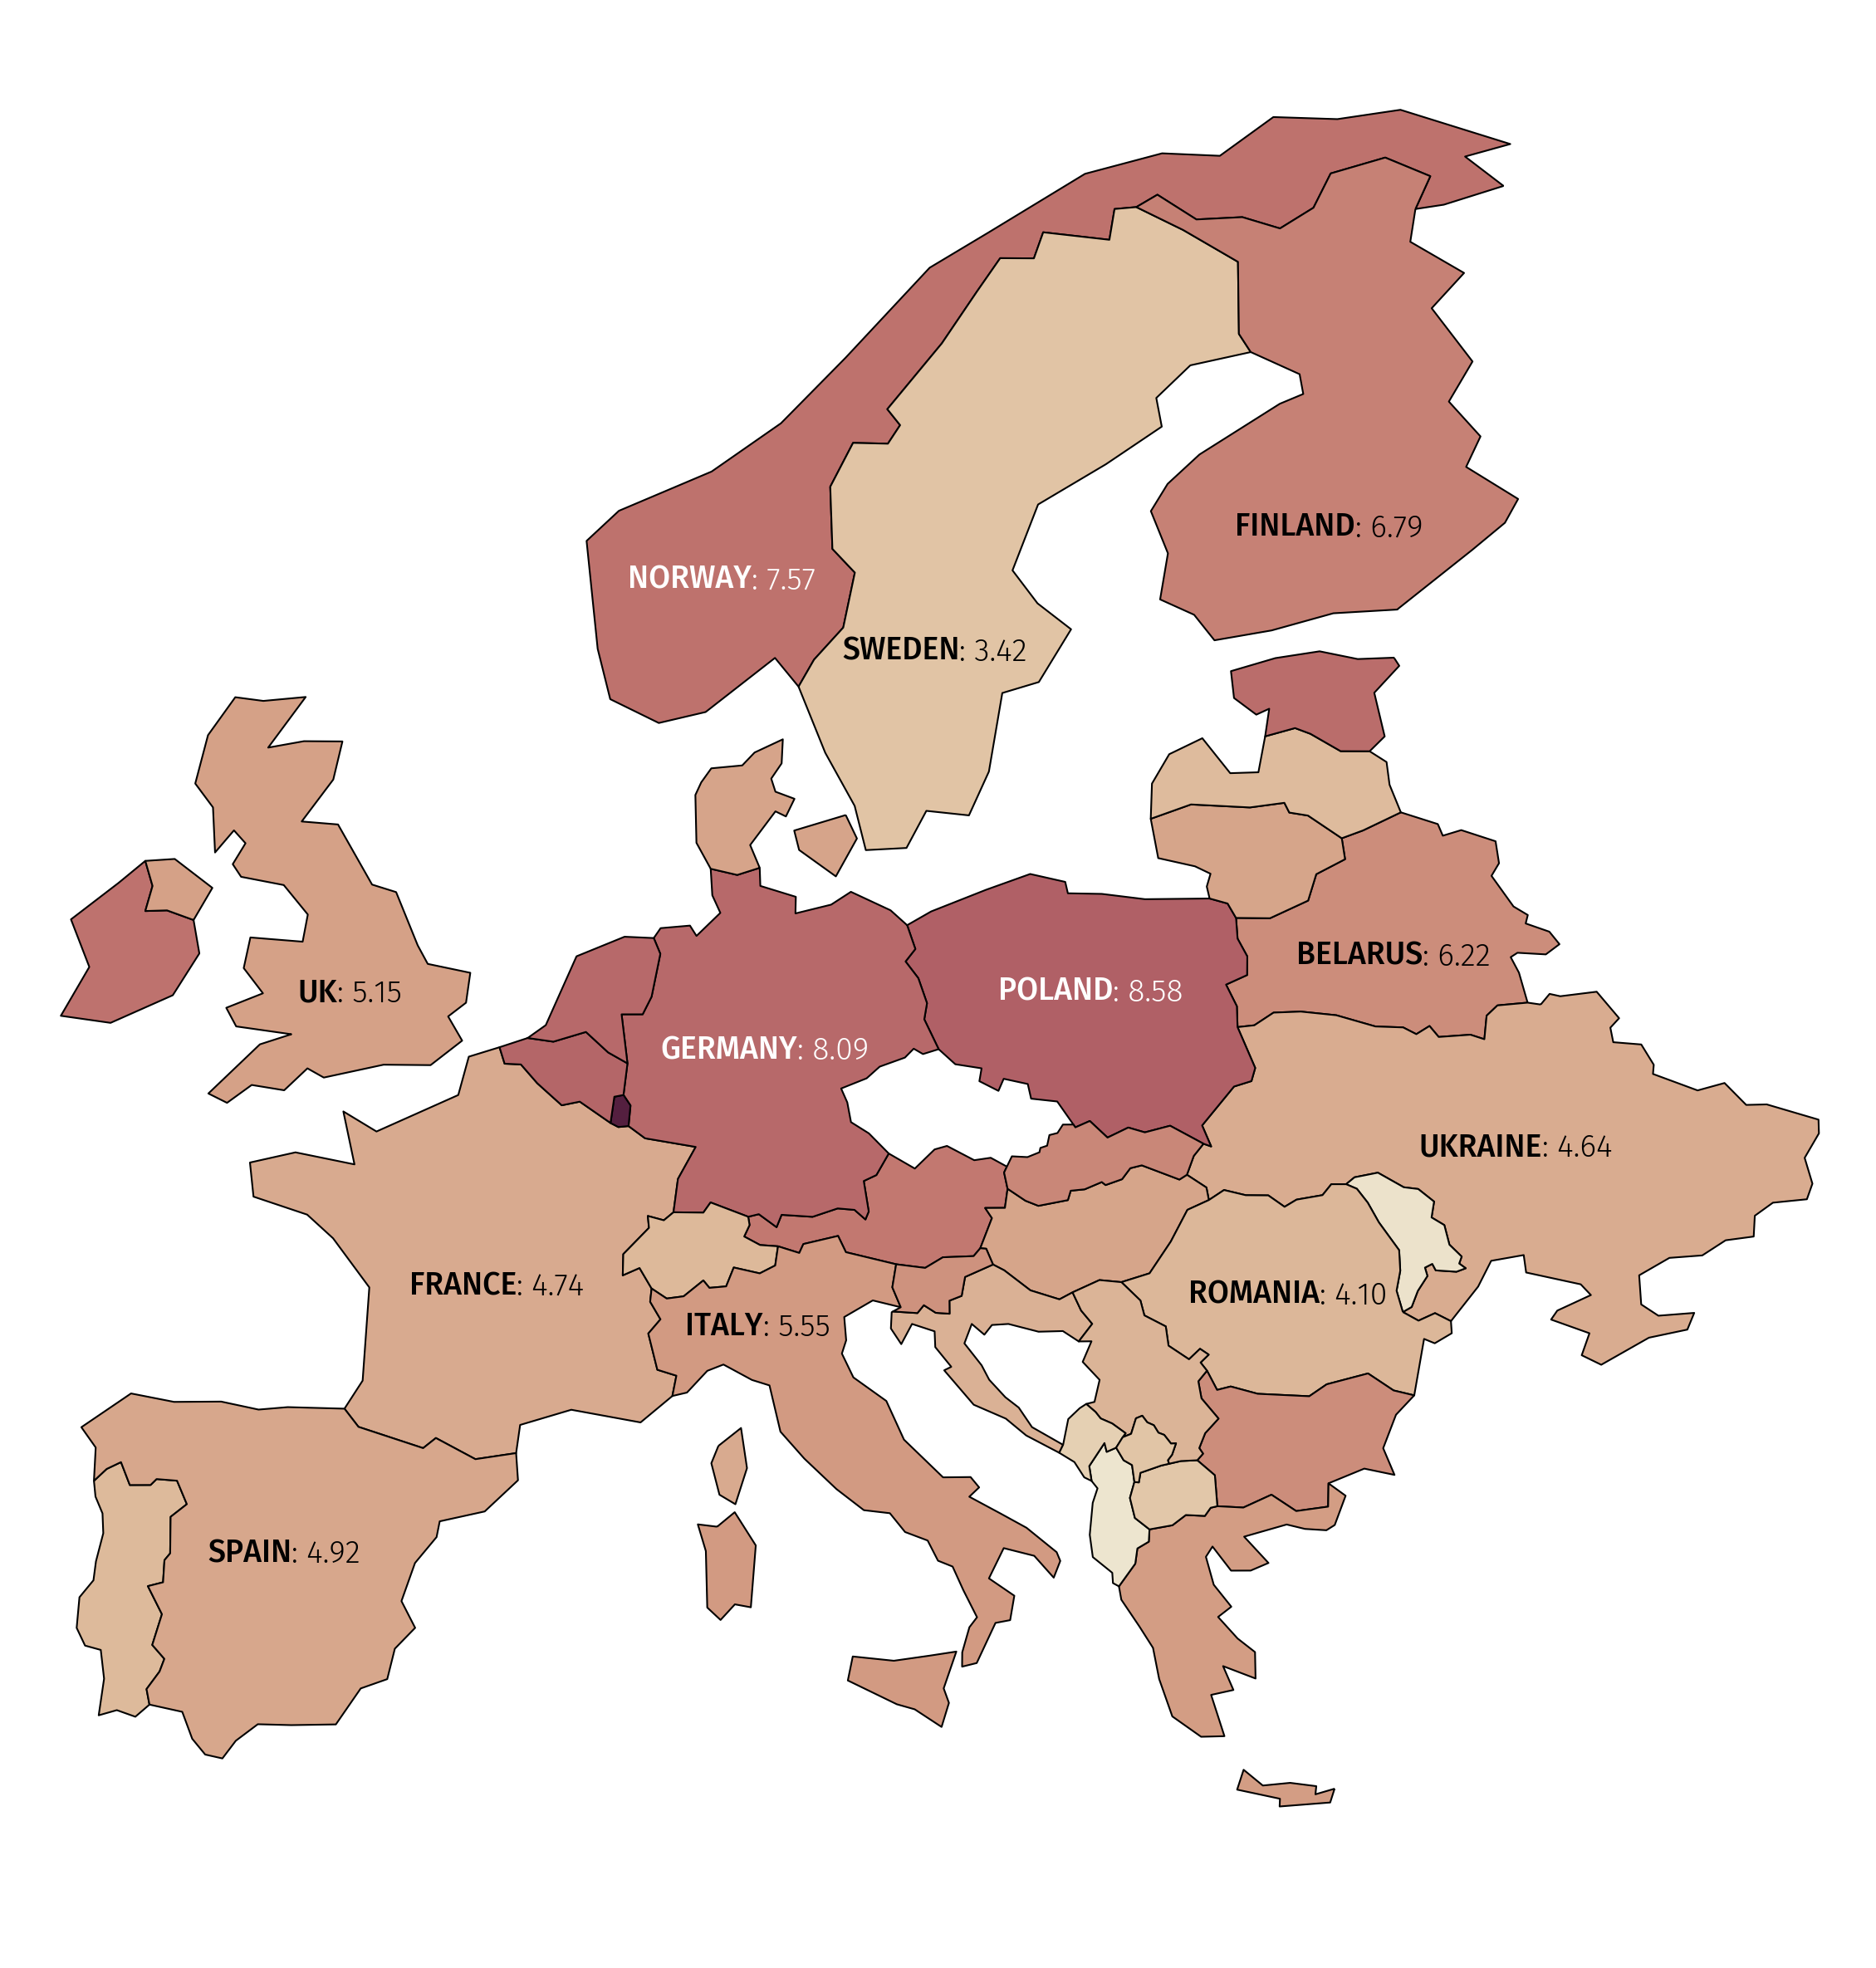

In [9]:
adjustments = {
    'France': (10, 3),
    'Italy': (-2.4, 2.5),
    'Finland': (0, -2),
    'Belarus': (0, -0.4),
    'Ireland': (0, -1),
    'Germany': (-0.2, 0),
    'Poland': (0, 0.2),
    'Sweden': (-1.2, -2.8),
    'United Kingdom': (1, -1.5),
    'Norway': (-4, -5.5),
}

# load colormap and other colors
cmap = load_cmap('BrwnYl', type='continuous')
background_color = 'white'
text_color = 'black'

# load the fonts
personal_path = '/Users/josephbarbier/Library/Fonts/' # change this to your own path
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# compute the centroid of each country
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)

# define which countries to annotate
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine', 'Spain', 'Germany', 
   'Sweden', 'United Kingdom', 'Belarus', 'Norway'
]

# annotate each country
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 7:
      color_text = 'white'
   else:
      color_text = text_color # 'black'
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

plt.savefig("europe_map_8.png", dpi=300)
plt.show()

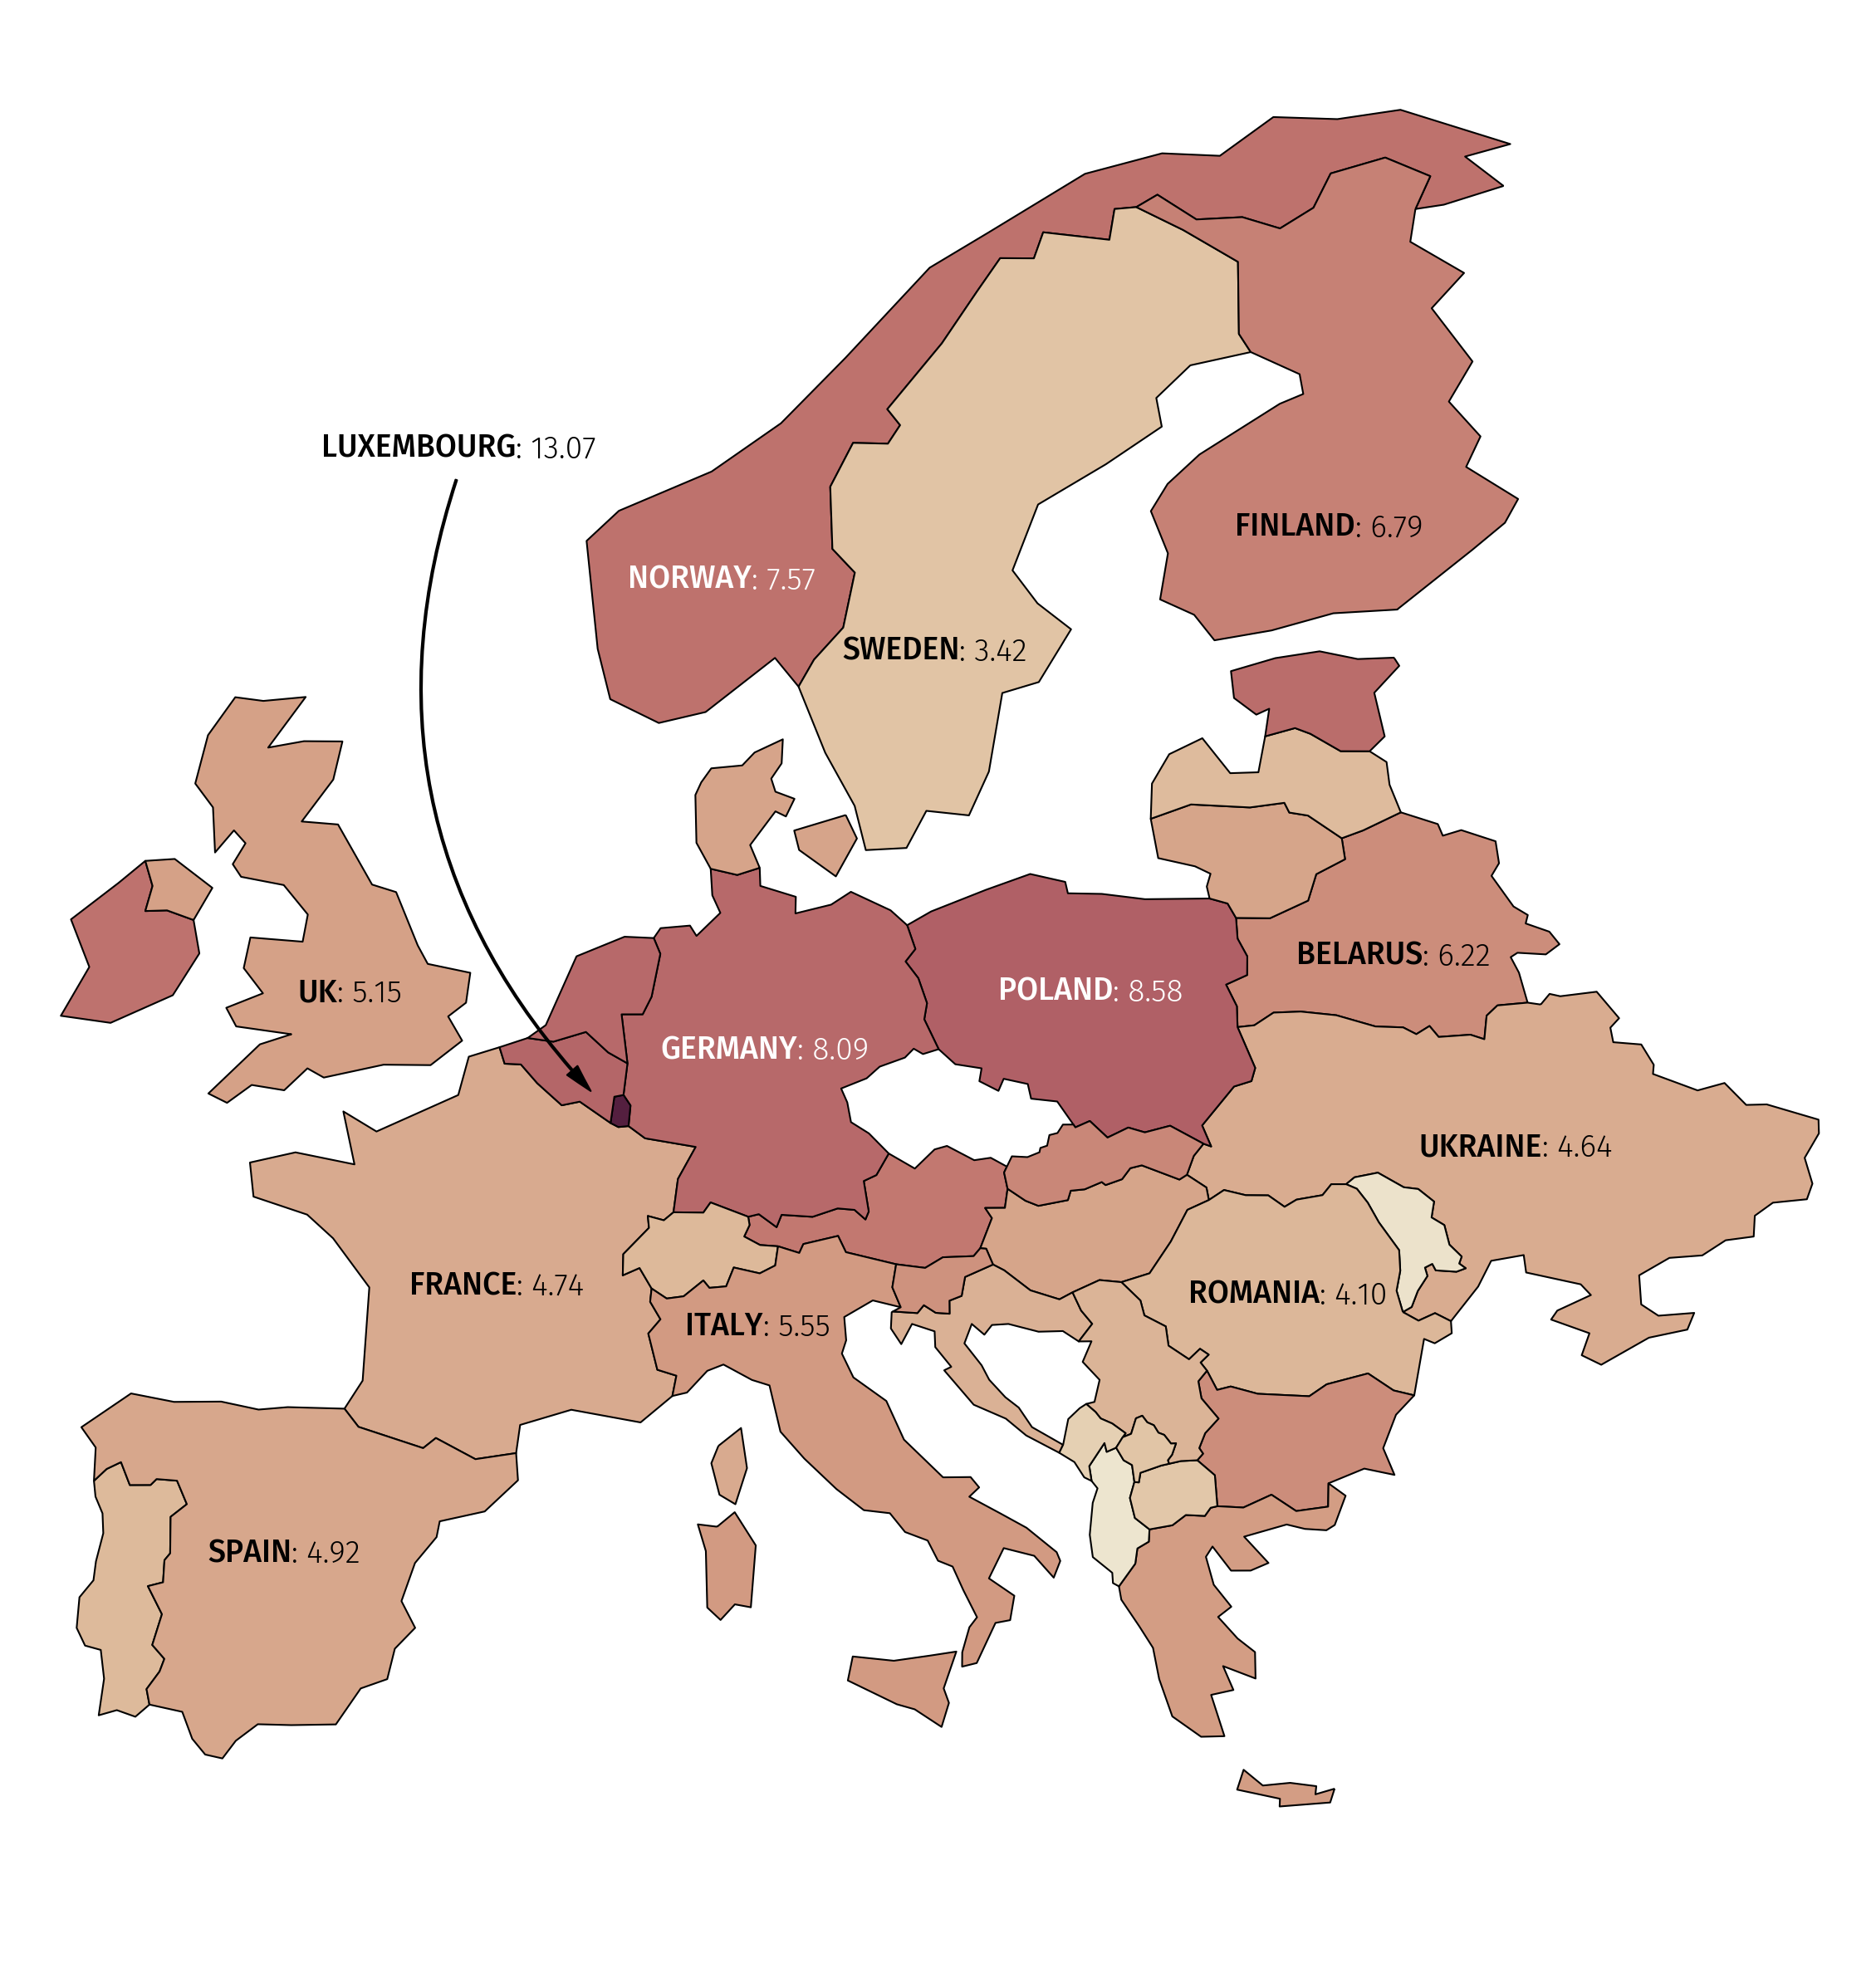

In [10]:
def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
    if fig is None:
        fig = plt.gcf()
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
    if invert:
        connectionstyle = f"arc3,rad=-{radius}"
    else:
        connectionstyle = f"arc3,rad={radius}"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)

adjustments = {
    'France': (10, 3),
    'Italy': (-2.4, 2.5),
    'Finland': (0, -2),
    'Belarus': (0, -0.4),
    'Ireland': (0, -1),
    'Germany': (-0.2, 0),
    'Poland': (0, 0.2),
    'Sweden': (-1.2, -2.8),
    'United Kingdom': (1, -1.5),
    'Norway': (-4, -5.5),
}

# load colormap and other colors
cmap = load_cmap('BrwnYl', type='continuous')
background_color = 'white'
text_color = 'black'

# load the fonts
personal_path = '/Users/josephbarbier/Library/Fonts/' # change this to your own path
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# compute the centroid of each country
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)

# define which countries to annotate
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine', 'Spain', 'Germany', 
   'Sweden', 'United Kingdom', 'Belarus', 'Norway'
]

# annotate each country
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 7:
      color_text = 'white'
   else:
      color_text = text_color # 'black'
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

# arrows for the Luxembourg
luxembourg_values = data.loc[data['name'] == 'Luxembourg', 'Total'].values[0]
draw_arrow((0.32, 0.7), (0.375, 0.45), radius=0.3, fig=fig)
fig_text(
   s=f"<LUXEMBOURG>: {luxembourg_values:.2f}", x=0.32, y=0.71, highlight_textprops=[{'font': other_bold_font}],
   color=text_color, fontsize=9, font=other_font, ha='center', va='center', fig=fig
)

plt.savefig("europe_map_9.png", dpi=300)
plt.show()

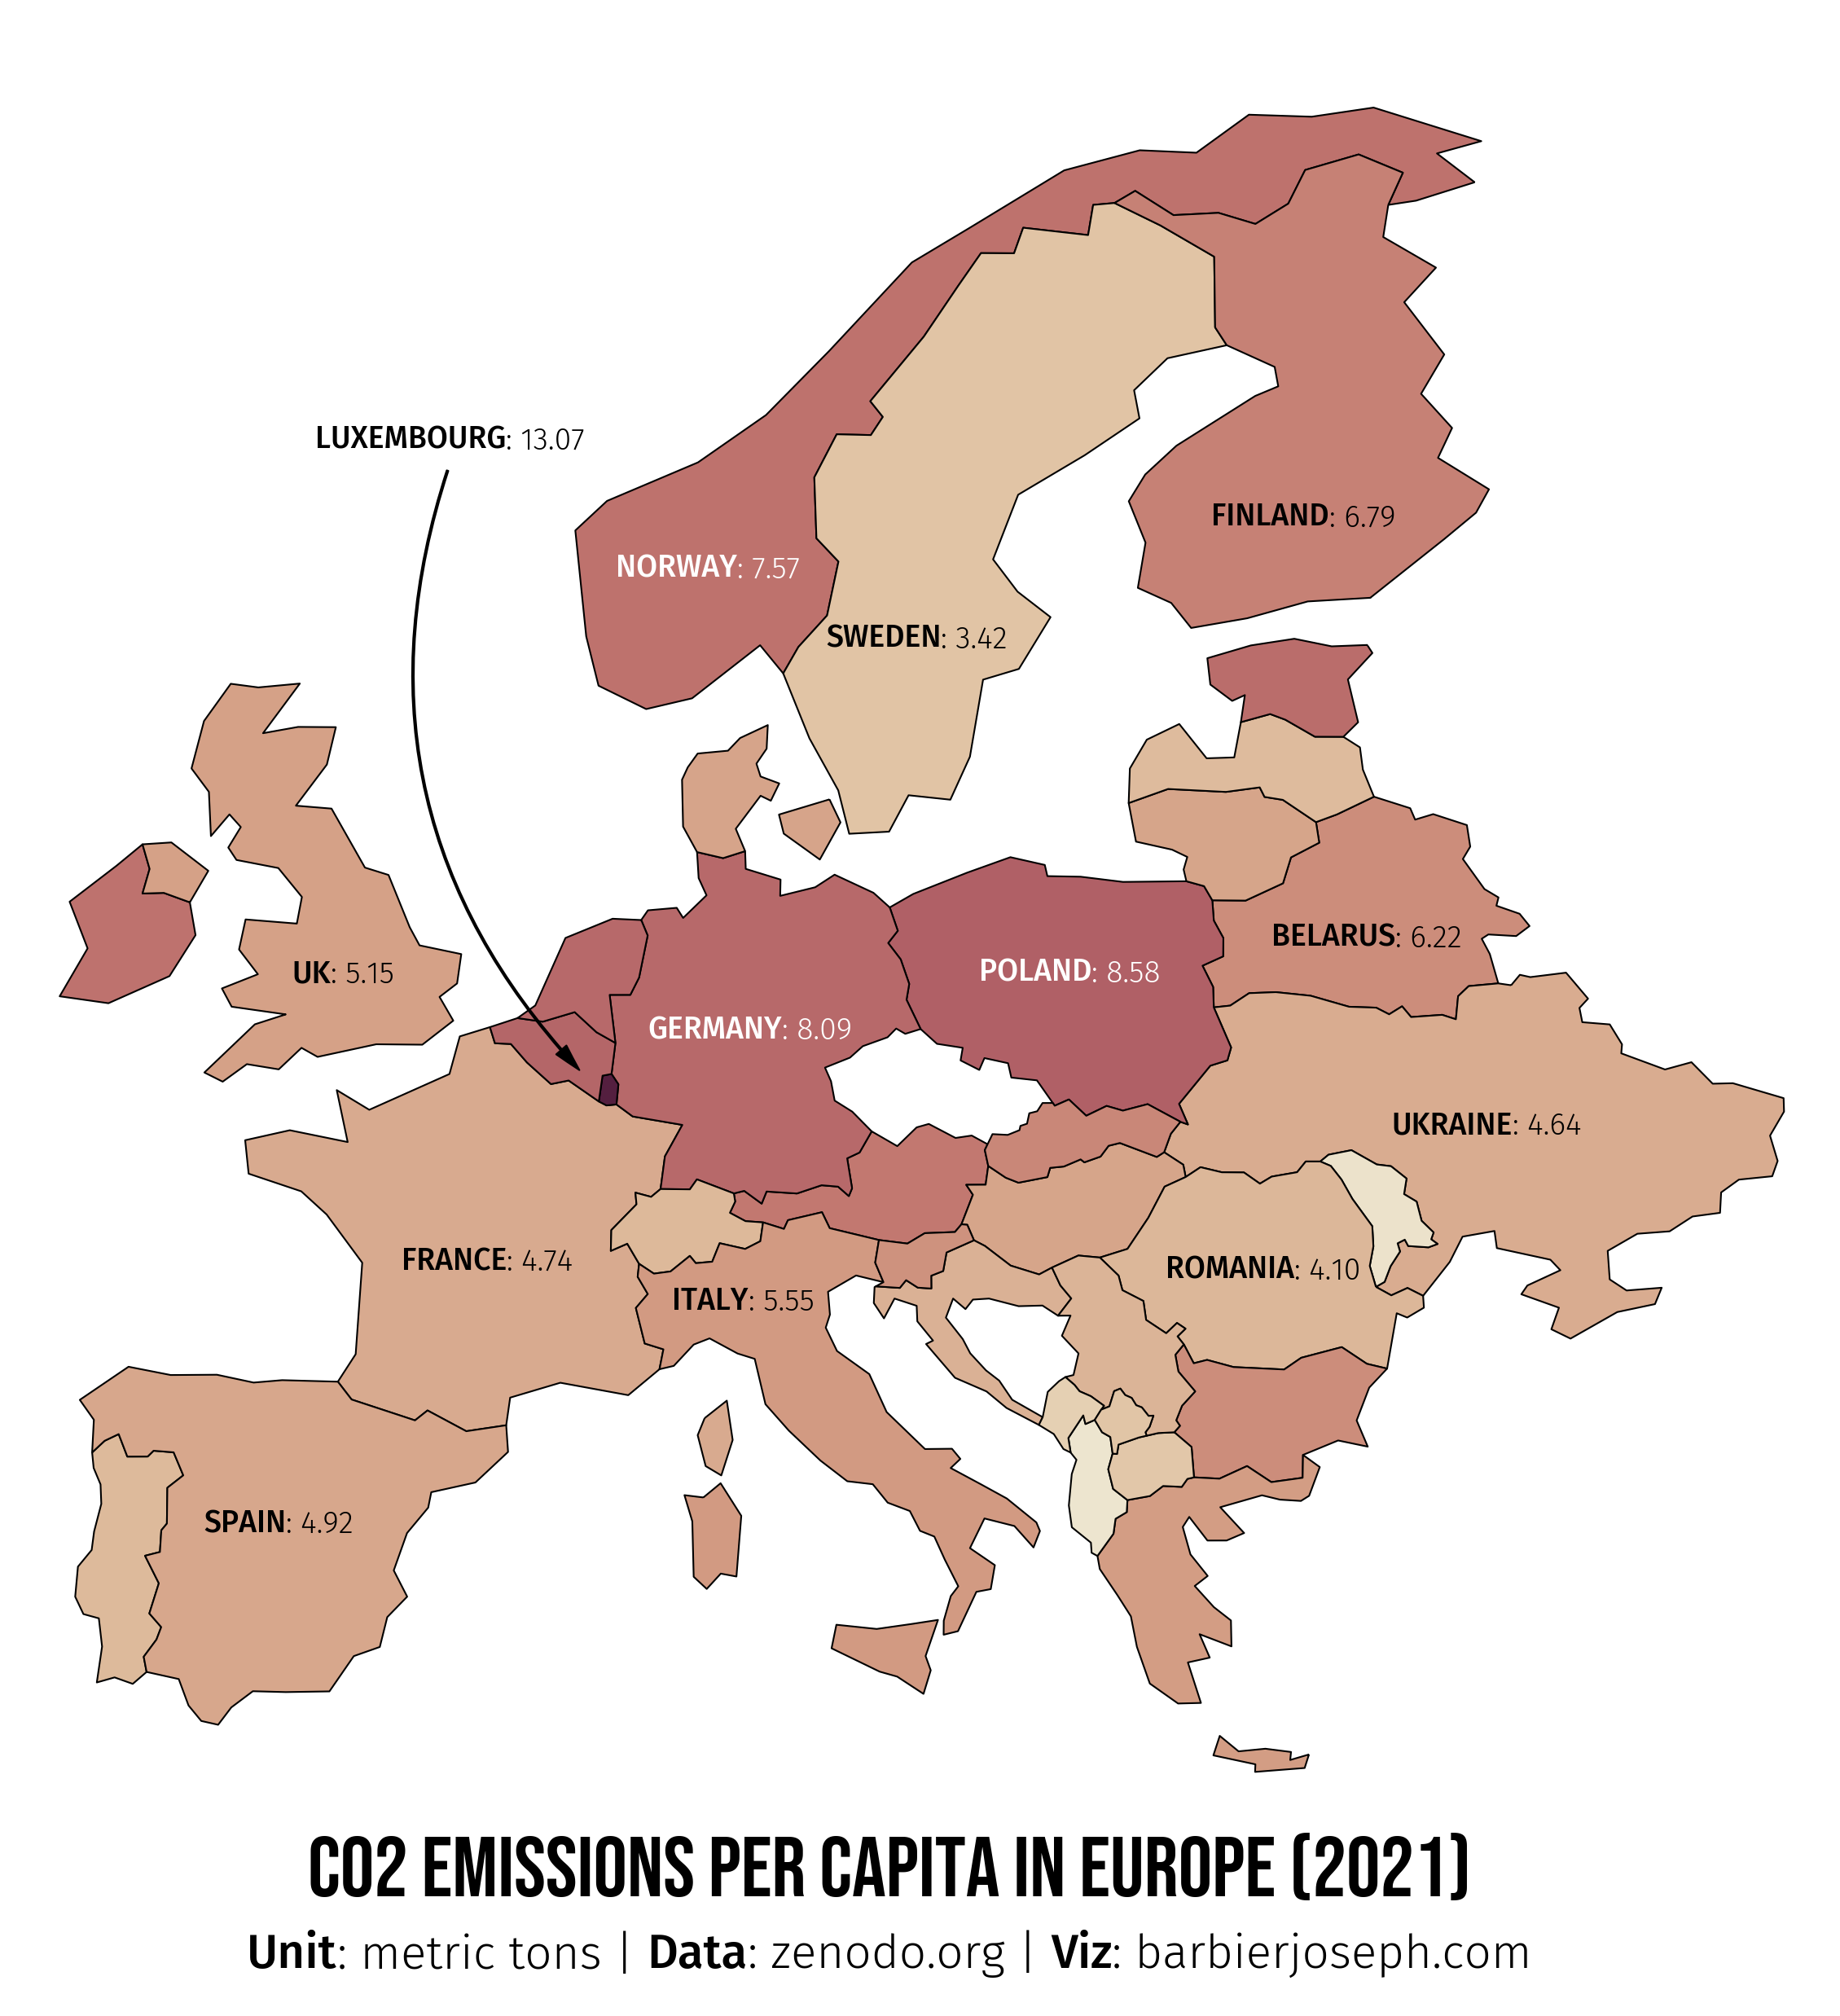

In [11]:
def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
    if fig is None:
        fig = plt.gcf()
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
    if invert:
        connectionstyle = f"arc3,rad=-{radius}"
    else:
        connectionstyle = f"arc3,rad={radius}"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)

adjustments = {
    'France': (10, 3),
    'Italy': (-2.4, 2.5),
    'Finland': (0, -2),
    'Belarus': (0, -0.4),
    'Ireland': (0, -1),
    'Germany': (-0.2, 0),
    'Poland': (0, 0.2),
    'Sweden': (-1.2, -2.8),
    'United Kingdom': (1, -1.5),
    'Norway': (-4, -5.5),
}

# load colormap and other colors
cmap = load_cmap('BrwnYl', type='continuous')
background_color = 'white'
text_color = 'black'

# load the fonts
personal_path = '/Users/josephbarbier/Library/Fonts/' # change this to your own path
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# compute the centroid of each country
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)

# define which countries to annotate
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine', 'Spain', 'Germany', 
   'Sweden', 'United Kingdom', 'Belarus', 'Norway'
]

# annotate each country
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 7:
      color_text = 'white'
   else:
      color_text = text_color # 'black'
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

# title
fig_text(
   s="CO2 emissions per capita in Europe (2021)", x=0.5, y=0.14,
   color=text_color, fontsize=25, font=font, ha='center', va='top', ax=ax
)

# subtitle
fig_text(
   s="<Unit>: metric tons | <Data>: zenodo.org | <Viz>: barbierjoseph.com", x=0.5, y=0.1,
   color=text_color, fontsize=14, font=other_font, ha='center', va='top', ax=ax,
   highlight_textprops=[{'font': other_bold_font}, {'font': other_bold_font}, {'font': other_bold_font}]
)

# arrows for the Luxembourg
luxembourg_values = data.loc[data['name'] == 'Luxembourg', 'Total'].values[0]
draw_arrow((0.32, 0.7), (0.375, 0.45), radius=0.3, fig=fig)
fig_text(
   s=f"<LUXEMBOURG>: {luxembourg_values:.2f}", x=0.32, y=0.71, highlight_textprops=[{'font': other_bold_font}],
   color=text_color, fontsize=9, font=other_font, ha='center', va='center', fig=fig
)

plt.savefig("europe_map_10.png", dpi=300)
plt.show()

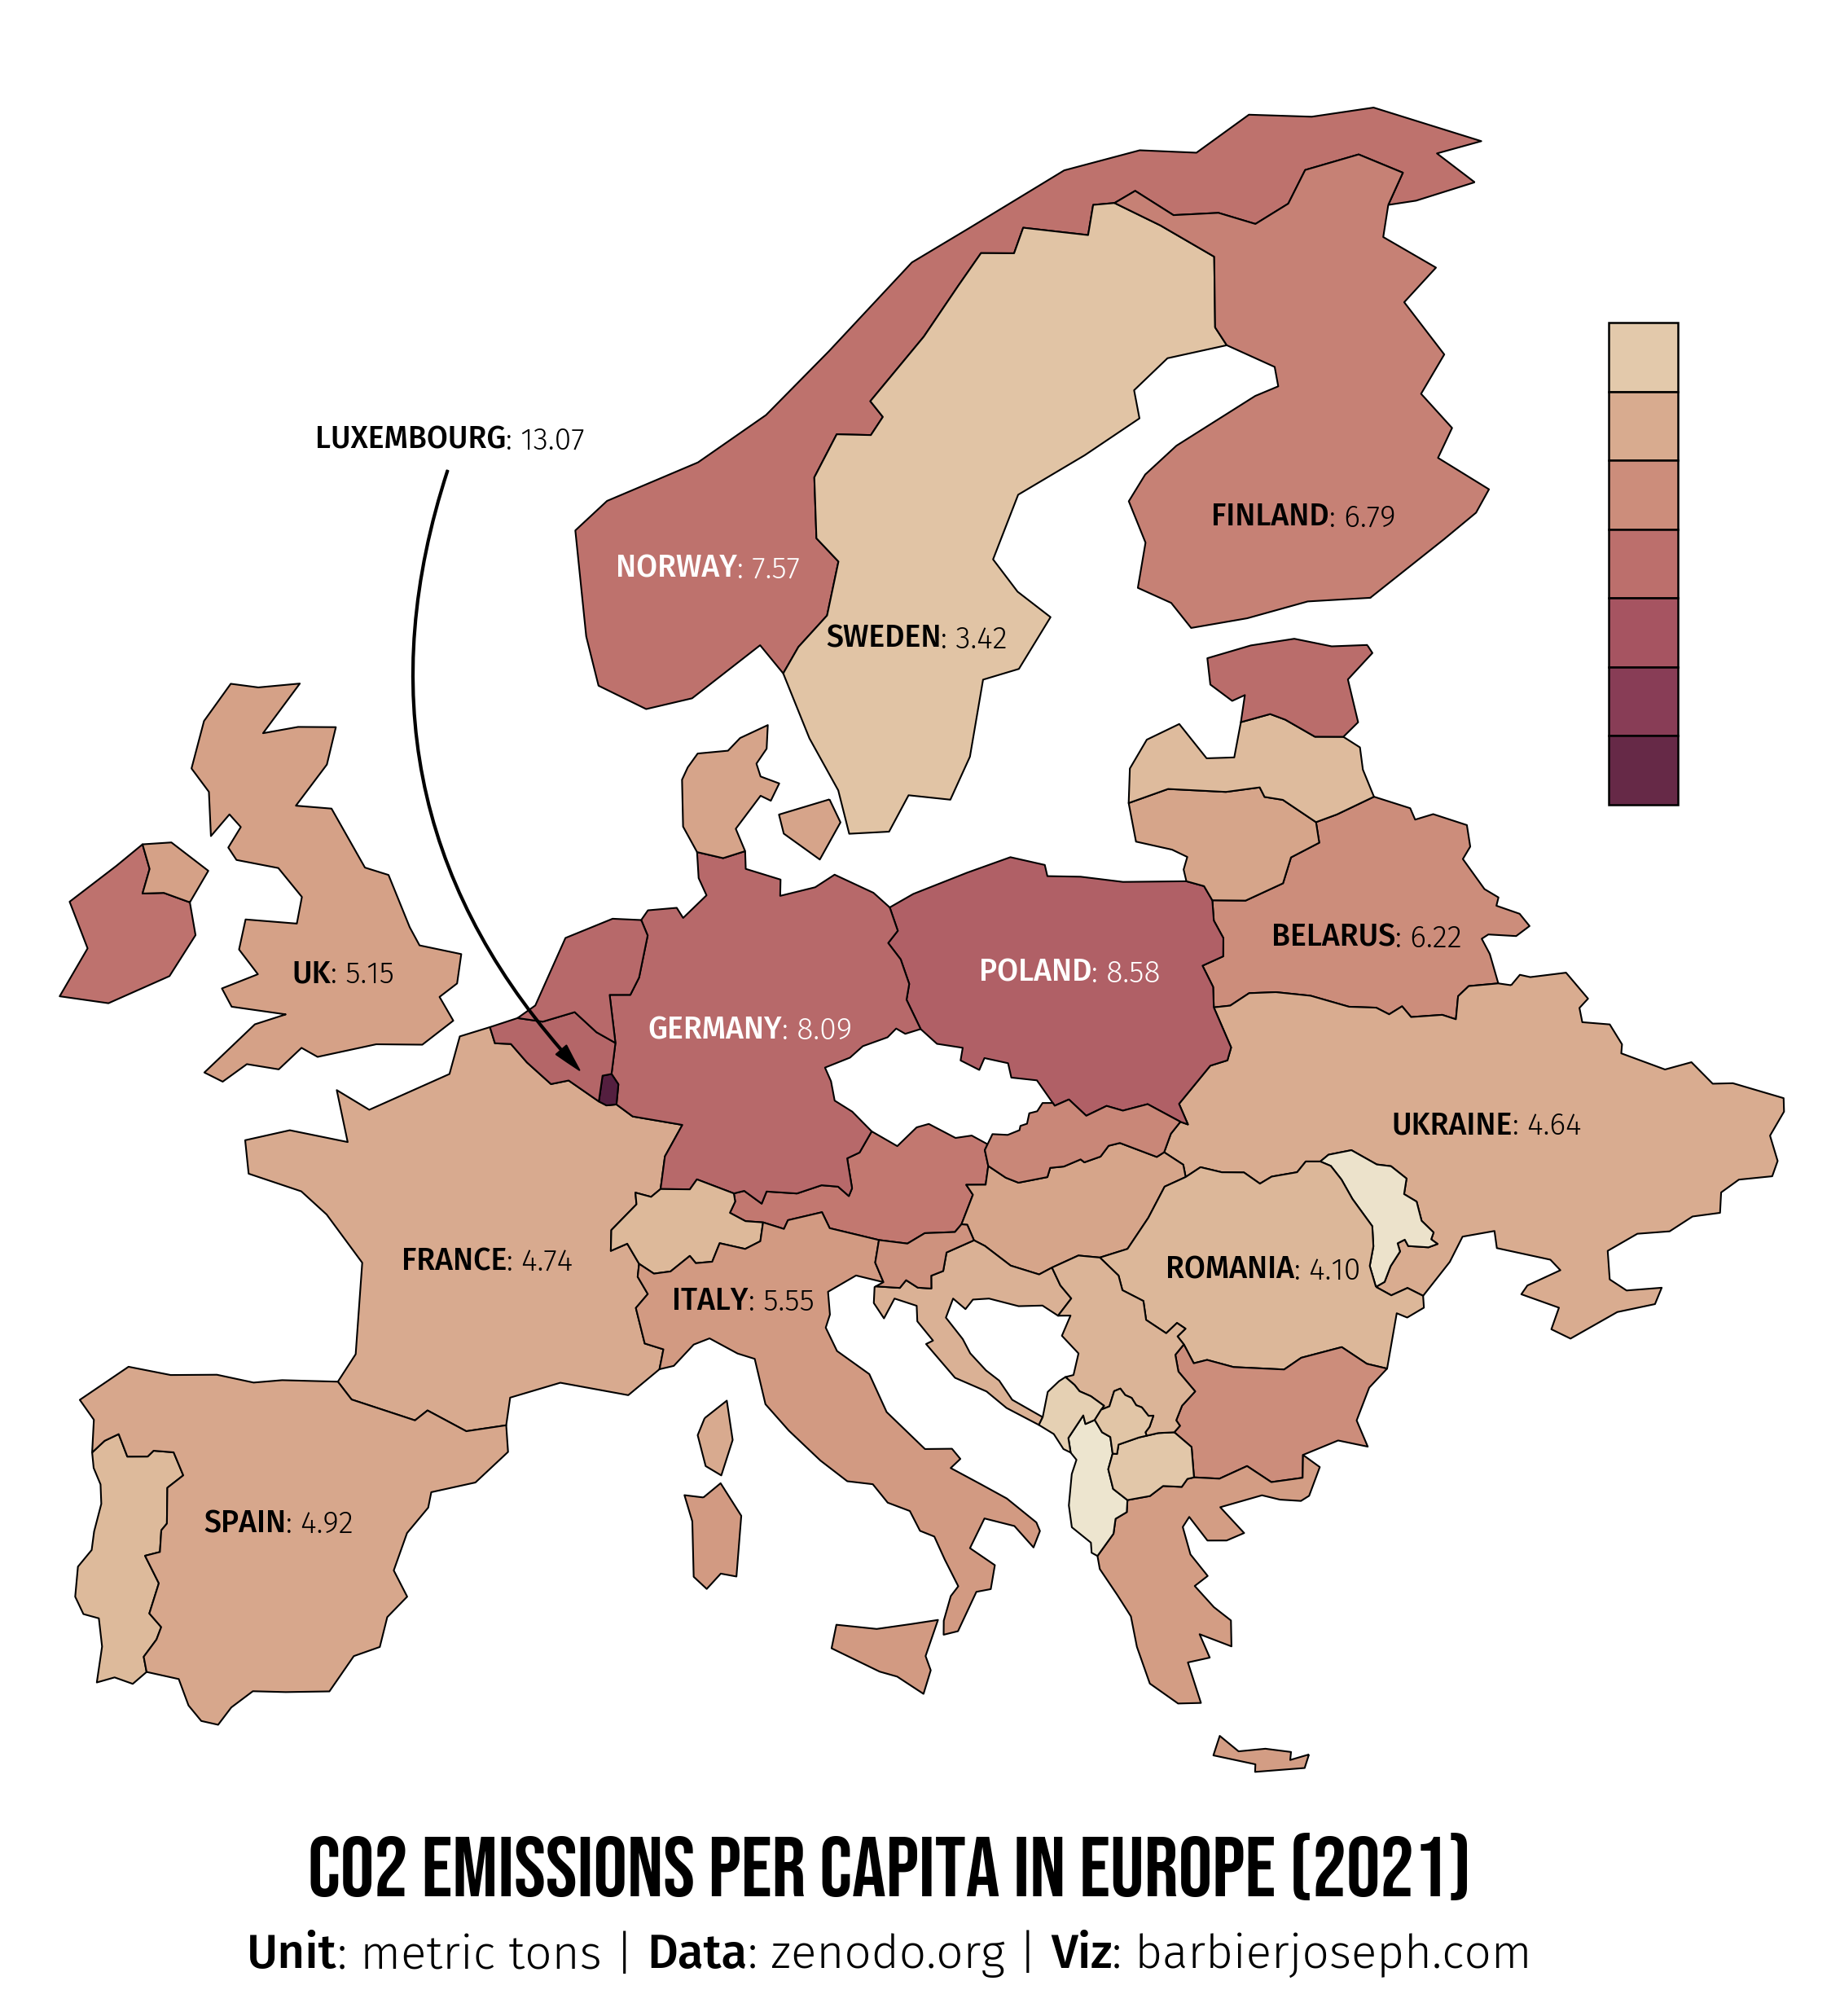

In [12]:
def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
    if fig is None:
        fig = plt.gcf()
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
    if invert:
        connectionstyle = f"arc3,rad=-{radius}"
    else:
        connectionstyle = f"arc3,rad={radius}"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)

# load the colormap
cmap = load_cmap('BrwnYl', type='continuous')
background_color = 'white'
text_color = 'black'

value_ranges = [1, 3, 5, 7, 9, 11, 13, 15]
labels = ['0-2 t', '2-4 t', '4-6 t', '6-8 t', '8-10 t', '10-12 t', '12+ t']

# load the font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# define range and values for the legend
value_ranges = [1, 3, 5, 7, 9, 11, 13, 15]
labels = ['0-2 t', '2-4 t', '4-6 t', '6-8 t', '8-10 t', '10-12 t', '12+ t']

# parameters of the legend
rectangle_width = 2
rectangle_height = 1.5
legend_x = 35
legend_y_start = 65
legend_y_step = 1.5

# create the legend
for i in range(len(labels)):
   value = (value_ranges[i] + value_ranges[i + 1]) / 2 / value_ranges[-1]  # Normalize the value to [0, 1]
   color = cmap(value)
   ax.add_patch(plt.Rectangle((legend_x, legend_y_start - i * legend_y_step), rectangle_width, rectangle_height,
                              color=color, ec='black', lw=0.6))

# compute centroids and display the total
adjustments = {
   'France': (10, 3),
   'Italy': (-2.4, 2.5),
   'Finland': (0, -2),
   'Belarus': (0, -0.4),
   'Ireland': (0, -1),
   'Germany': (-0.2, 0),
   'Poland': (0, 0.2),
   'Sweden': (-1.2, -2.8),
   'United Kingdom': (1, -1.5),
   'Norway': (-4, -5.5),
}
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
countries_to_annotate = data['name'].tolist()
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine',
   'Spain', 'Germany', 
   'Sweden', 'United Kingdom',
   'Belarus', 'Norway'
]
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 7:
      color_text = 'white'
   else:
      color_text = text_color
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

# title
fig_text(
   s="CO2 emissions per capita in Europe (2021)", x=0.5, y=0.14,
   color=text_color, fontsize=25, font=font, ha='center', va='top', ax=ax
)

# subtitle
fig_text(
   s="<Unit>: metric tons | <Data>: zenodo.org | <Viz>: barbierjoseph.com", x=0.5, y=0.1,
   color=text_color, fontsize=14, font=other_font, ha='center', va='top', ax=ax,
   highlight_textprops=[{'font': other_bold_font}, {'font': other_bold_font}, {'font': other_bold_font}]
)

# arrows for the Luxembourg
luxembourg_values = data.loc[data['name'] == 'Luxembourg', 'Total'].values[0]
draw_arrow((0.32, 0.7), (0.375, 0.45), radius=0.3, fig=fig)
fig_text(
   s=f"<LUXEMBOURG>: {luxembourg_values:.2f}", x=0.32, y=0.71, highlight_textprops=[{'font': other_bold_font}],
   color=text_color, fontsize=9, font=other_font, ha='center', va='center', fig=fig
)

# display the plot
plt.savefig("europe_map_11.png", dpi=300)
plt.show()

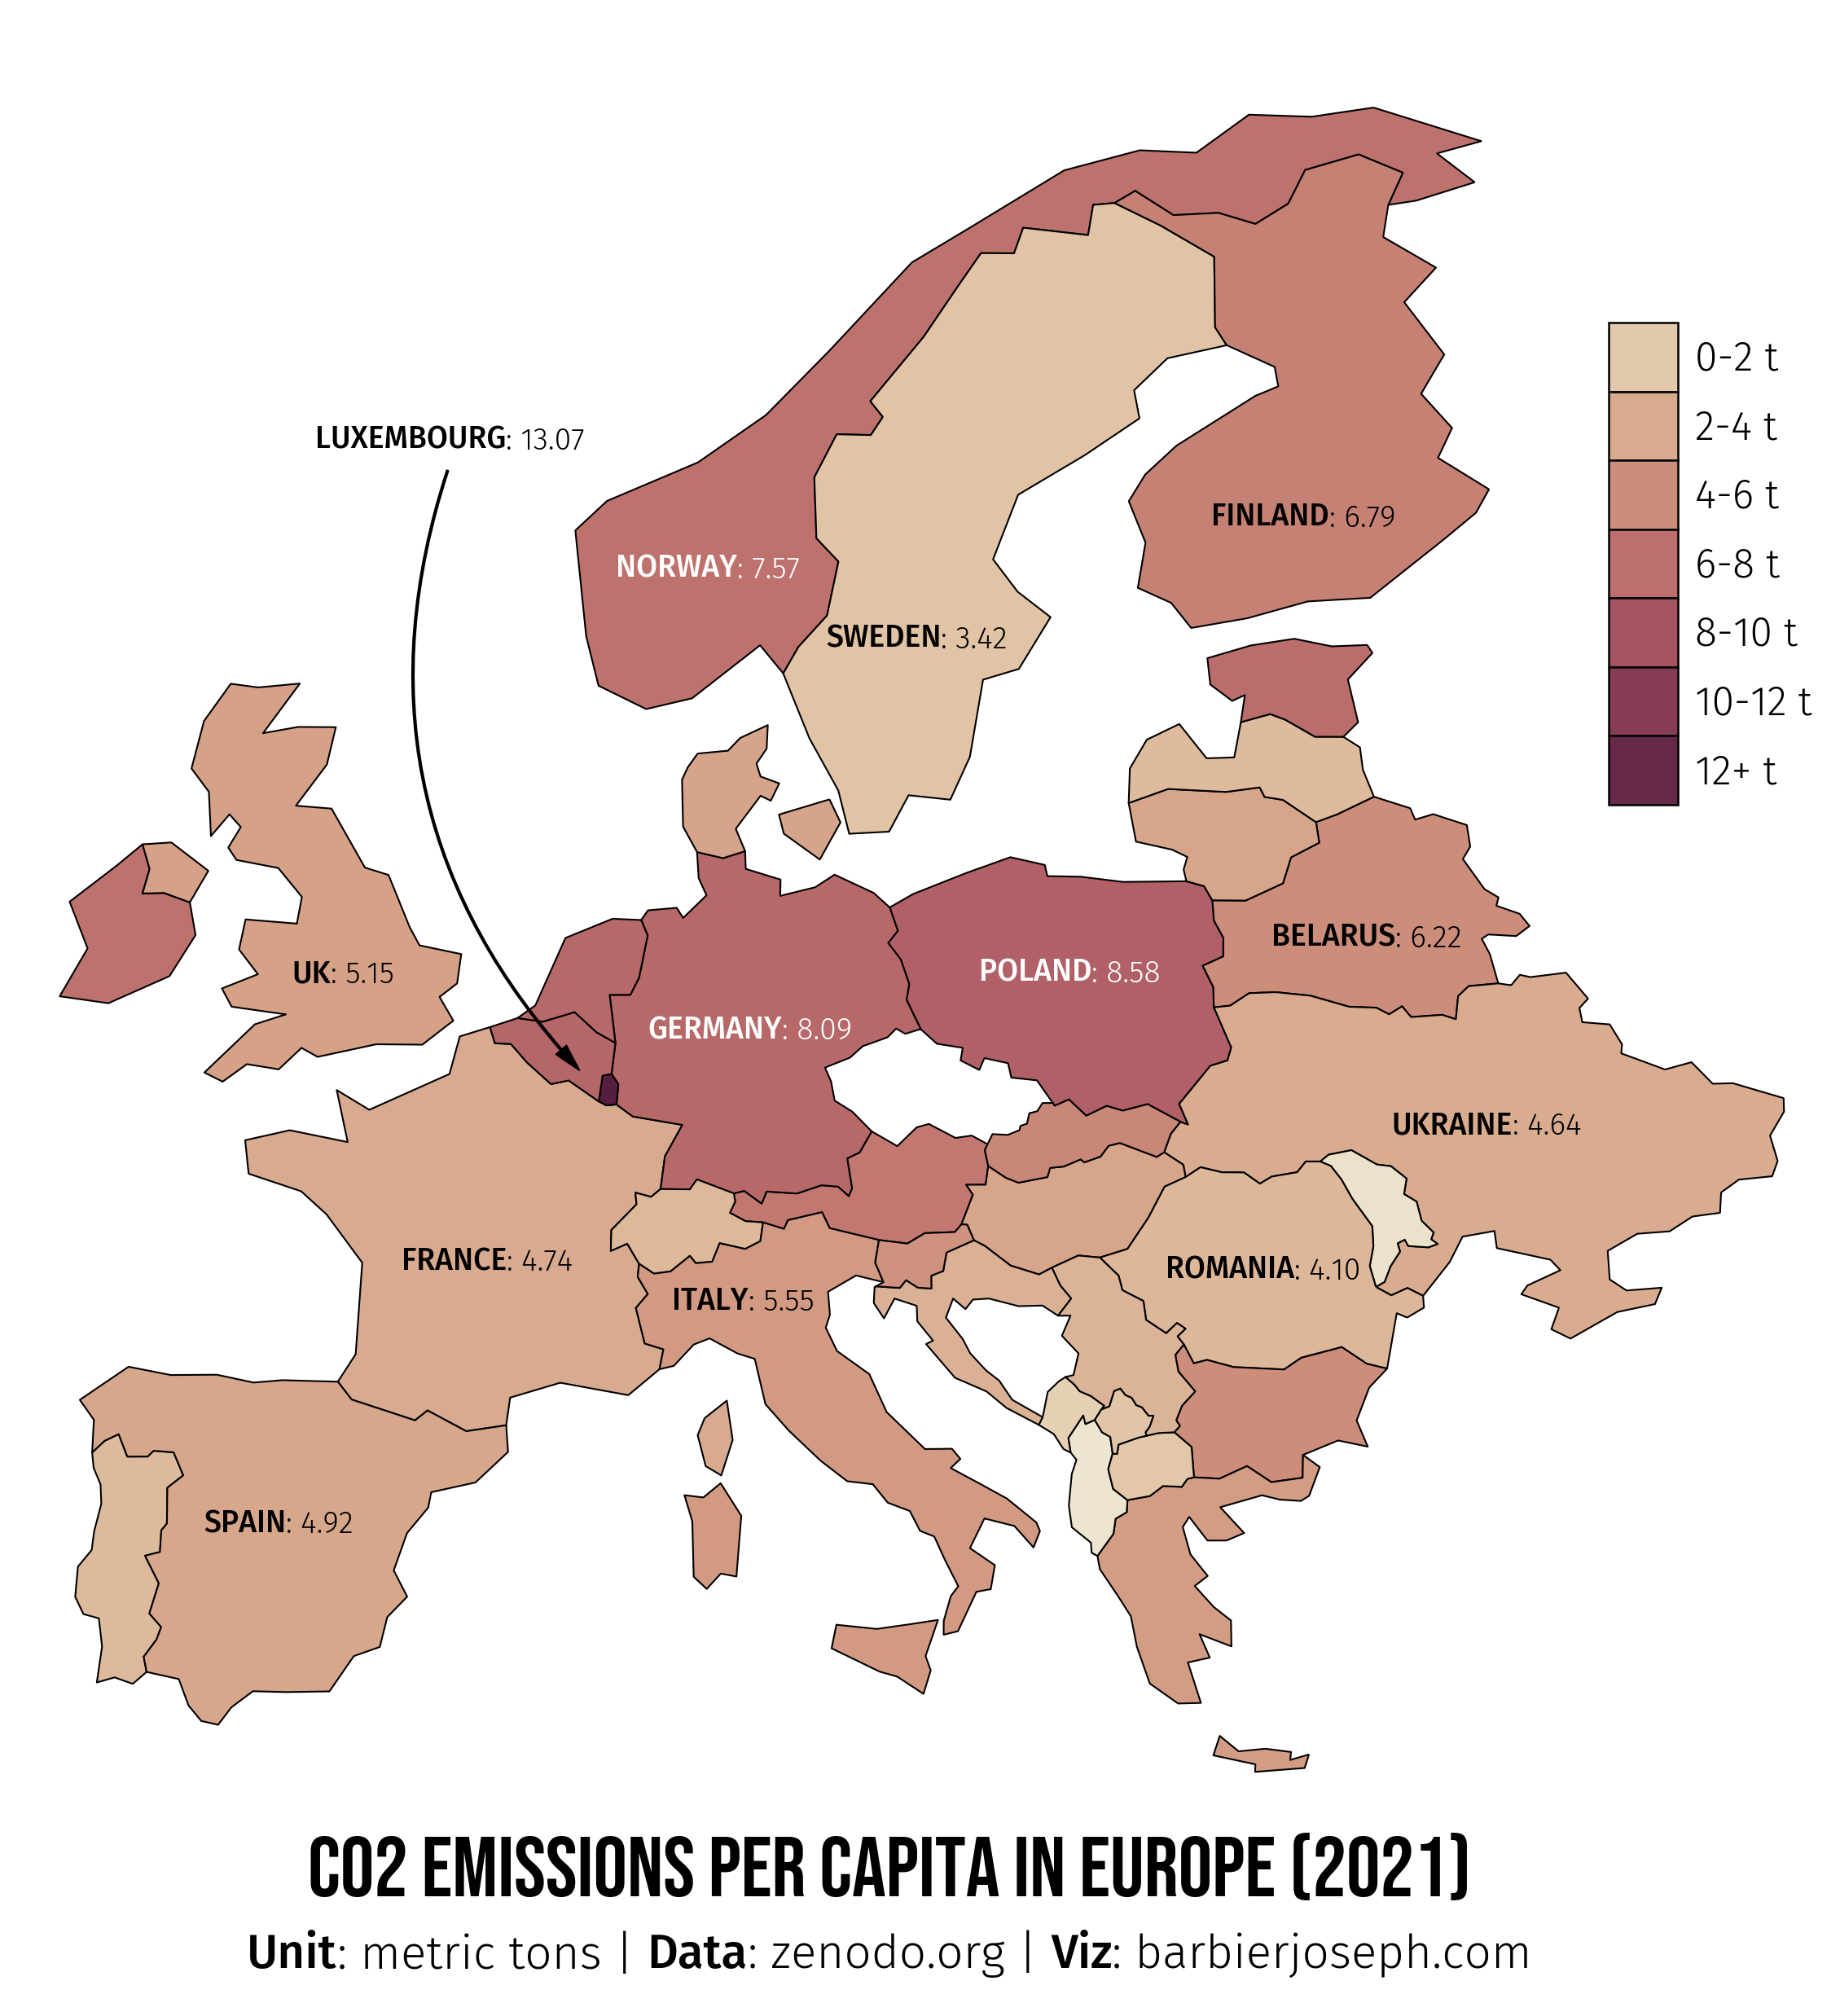

In [13]:
def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
    if fig is None:
        fig = plt.gcf()
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
    if invert:
        connectionstyle = f"arc3,rad=-{radius}"
    else:
        connectionstyle = f"arc3,rad={radius}"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)

# load the colormap
cmap = load_cmap('BrwnYl', type='continuous')
background_color = 'white'
text_color = 'black'

value_ranges = [1, 3, 5, 7, 9, 11, 13, 15]
labels = ['0-2 t', '2-4 t', '4-6 t', '6-8 t', '8-10 t', '10-12 t', '12+ t']

# load the font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
fig.set_facecolor(background_color)

# create the plot
data.plot(ax=ax, column='Total', cmap=cmap, edgecolor='black', linewidth=0.5)

# custom axis
ax.set_xlim(-11, 41)
ax.set_ylim(32, 73)
ax.set_axis_off()

# define range and values for the legend
value_ranges = [1, 3, 5, 7, 9, 11, 13, 15]
labels = ['0-2 t', '2-4 t', '4-6 t', '6-8 t', '8-10 t', '10-12 t', '12+ t']

# parameters of the legend
rectangle_width = 2
rectangle_height = 1.5
legend_x = 35
legend_y_start = 65
legend_y_step = 1.5

# create the legend
for i in range(len(labels)):
   value = (value_ranges[i] + value_ranges[i + 1]) / 2 / value_ranges[-1]  # Normalize the value to [0, 1]
   color = cmap(value)
   ax.add_patch(plt.Rectangle((legend_x, legend_y_start - i * legend_y_step), rectangle_width, rectangle_height,
                              color=color, ec='black', lw=0.6))
   ax.text(legend_x + 2.5, legend_y_start - i * legend_y_step + 0.7, labels[i], 
         fontsize=12, fontproperties=other_font, color=text_color, va='center')

# compute centroids and display the total
adjustments = {
   'France': (10, 3),
   'Italy': (-2.4, 2.5),
   'Finland': (0, -2),
   'Belarus': (0, -0.4),
   'Ireland': (0, -1),
   'Germany': (-0.2, 0),
   'Poland': (0, 0.2),
   'Sweden': (-1.2, -2.8),
   'United Kingdom': (1, -1.5),
   'Norway': (-4, -5.5),
}
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
countries_to_annotate = data['name'].tolist()
countries_to_annotate = [
   'France', 'Italy', 'Romania', 'Poland',
   'Finland', 'Ukraine',
   'Spain', 'Germany', 
   'Sweden', 'United Kingdom',
   'Belarus', 'Norway'
]
for country in countries_to_annotate:
   centroid = data.loc[data['name'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   try:
      x += adjustments[country][0]
      y += adjustments[country][1]
   except KeyError:
      pass
   rate = data.loc[data['name'] == country, 'Total'].values[0]
   if country=='United Kingdom':
      country = 'UK'
   if rate > 7:
      color_text = 'white'
   else:
      color_text = text_color
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {rate:.2f}", fontsize=9, font=other_font, color=color_text,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

# title
fig_text(
   s="CO2 emissions per capita in Europe (2021)", x=0.5, y=0.14,
   color=text_color, fontsize=25, font=font, ha='center', va='top', ax=ax
)

# subtitle
fig_text(
   s="<Unit>: metric tons | <Data>: zenodo.org | <Viz>: barbierjoseph.com", x=0.5, y=0.1,
   color=text_color, fontsize=14, font=other_font, ha='center', va='top', ax=ax,
   highlight_textprops=[{'font': other_bold_font}, {'font': other_bold_font}, {'font': other_bold_font}]
)

# arrows for the Luxembourg
luxembourg_values = data.loc[data['name'] == 'Luxembourg', 'Total'].values[0]
draw_arrow((0.32, 0.7), (0.375, 0.45), radius=0.3, fig=fig)
fig_text(
   s=f"<LUXEMBOURG>: {luxembourg_values:.2f}", x=0.32, y=0.71, highlight_textprops=[{'font': other_bold_font}],
   color=text_color, fontsize=9, font=other_font, ha='center', va='center', fig=fig
)

# display the plot
plt.savefig("europe_map_12.png", dpi=300)
plt.show()